##  EE444/588 Project 2
Abu Bucker Siddik

In [1]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import glob
import skimage.morphology
import time
import scipy
import heapq
import sys
import cv2
from PIL import Image
from image_enhance import image_enhance
import math
from scipy.spatial import distance
from multiprocessing import Pool
from ridge_orient import ridge_orient
%matplotlib inline 
plt.rcParams.update({'font.size': 12})

## (a) Introductory Morphology

In this section, we learn to use the basic erosion, dilation, opening, and closing commands to
morphologically process an image.

## (a-i) Visualizing Structuring Elements:

We read <b>fingerprint-noisy.png</b> image into variable <b>A</b> and display the image. 

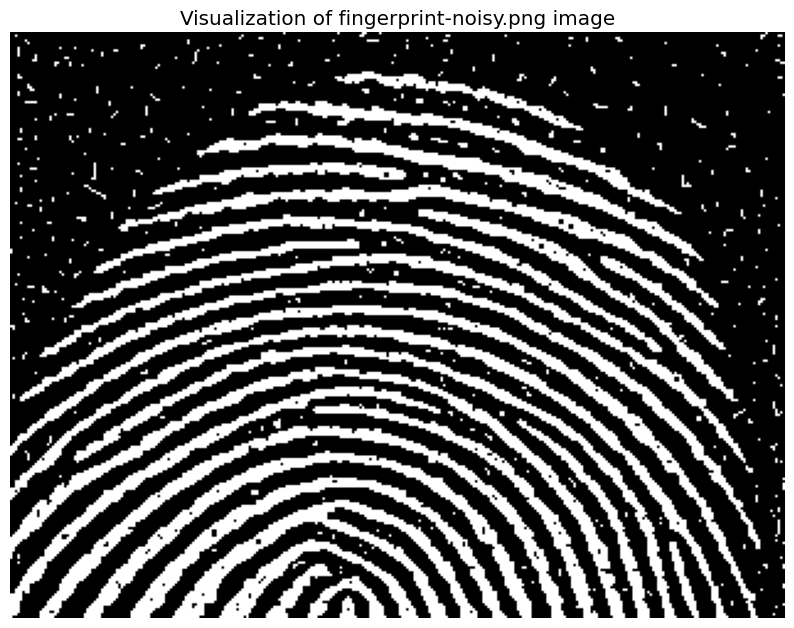

In [2]:
# Reading fingerprint-noisy.png
A = imageio.imread('fingerprint-noisy.png')

# Display fingerprint-noisy.png image
plt.figure(figsize=(10, 8)) 
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.title('Visualization of fingerprint-noisy.png image')
plt.show()

We define the structuring element <b>B_test</b>.

In [3]:
B_test=skimage.morphology.disk(11)
%whos

Variable        Type        Data/Info
-------------------------------------
A               Array       [[  0   0   0 ...   0   0<...>  0   0 ...   0   0   0]]
B_test          ndarray     23x23: 529 elems, type `uint8`, 529 bytes
Image           module      <module 'PIL.Image' from <...>e-packages/PIL/Image.py'>
Pool            method      <bound method BaseContext<...>bject at 0x7fd5b1305d50>>
cv2             module      <module 'cv2' from '/User<...>ackages/cv2/__init__.py'>
distance        module      <module 'scipy.spatial.di<...>ipy/spatial/distance.py'>
glob            module      <module 'glob' from '/Use<...>/lib/python3.10/glob.py'>
heapq           module      <module 'heapq' from '/Us<...>lib/python3.10/heapq.py'>
image_enhance   function    <function image_enhance at 0x7fd5b11d65f0>
imageio         module      <module 'imageio.v2' from<...>-packages/imageio/v2.py'>
math            module      <module 'math' from '/Use<...>h.cpython-310-darwin.so'>
np              module     

In [4]:
print("Dimensions of B_test: ", B_test.ndim)

Dimensions of B_test:  2


B_test is ndarray of type uint8. The dimension of B_test (23 x 23) is 2.

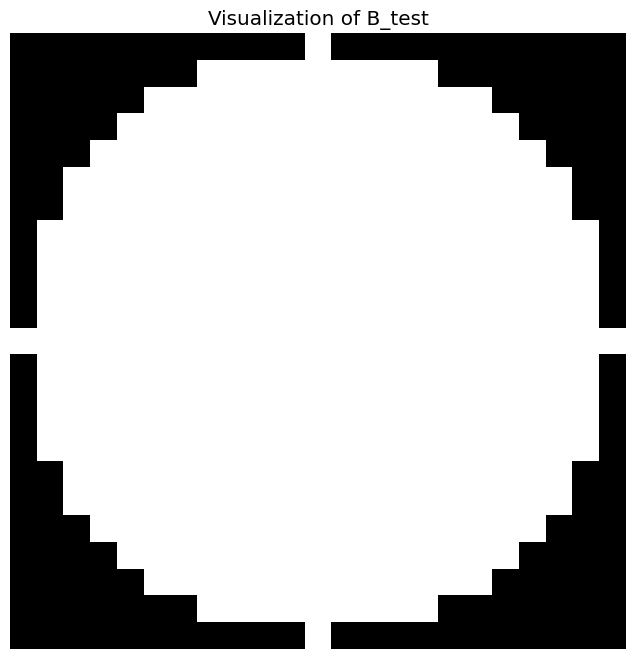

In [5]:
# visualize B_test
plt.figure(figsize=(10, 8)) 
plt.imshow(B_test, cmap='gray')
plt.axis('off')
plt.title('Visualization of B_test')
plt.show()

When we try to visualize <b>B_test</b> using <b>plt.imshow(B_test,cmap='gray')</b>, we find a disk shape structure with staircase and four openings (at top, bottom, right and left side of the shape).

## (a-ii) Erosion:
We define a structuring element <b>B</b> to be the same as the structuring element used in Figure 9.11
in the textbook. We define the erosion of image <b>A</b> by structuring element <b>B</b> as
<b>Ac</b> and display <b>Ac</b>.

In [6]:
# define structuring element B
B=skimage.morphology.square(3)
print(B)
# define the erosion of image A by B
Ac=skimage.morphology.binary_erosion(A,B)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


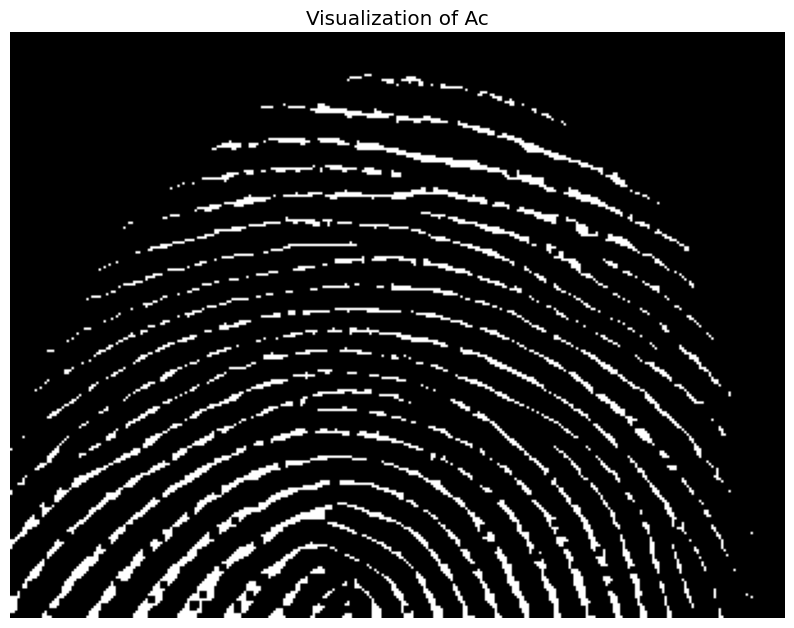

In [7]:
# display Ac
plt.figure(figsize=(10, 8)) 
plt.imshow(Ac, cmap='gray')
plt.axis('off')
plt.title('Visualization of Ac')
plt.show()


We observe that visualization of Ac corresponds to Figure 9.11(c) of textbook.

## (a-iii) Dilation and Opening:
We define <b>Ad1</b> as the dilation of image <b>Ac</b> by structuring element <b>B</b> and display image <b>Ad1</b> which corresponds to Figure 9.11(d) of textbook.

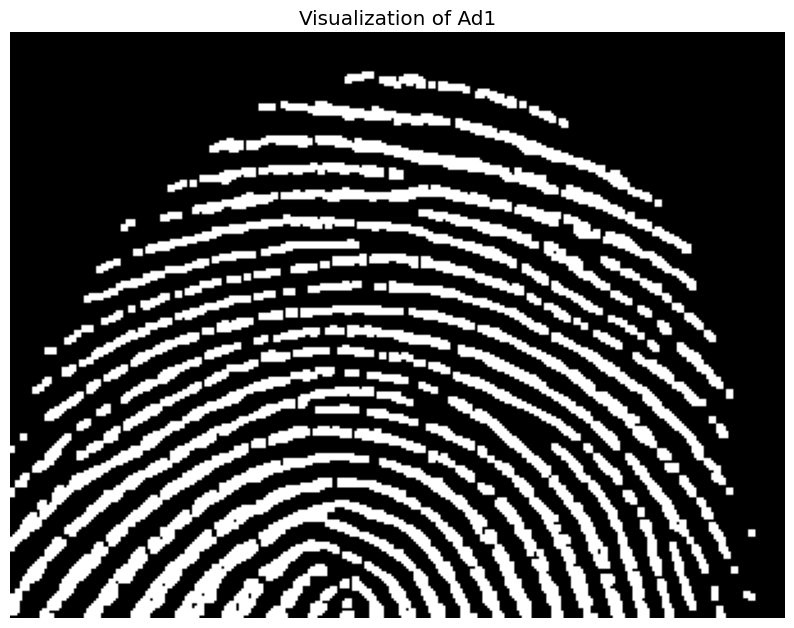

In [8]:
#define Ad1 as the dilation of image Ac by B
Ad1=skimage.morphology.binary_dilation(Ac,B)

# display Ad1
plt.figure(figsize=(10, 8)) 
plt.imshow(Ad1, cmap='gray')
plt.axis('off')
plt.title('Visualization of Ad1')
plt.show()

We define <b>Ad2</b> as the morphological opening of image <b>A</b> by structuring element <b>B</b>, display image <b>Ad2</b>, which also corresponds to Figure 9.11(d) of textbook. 

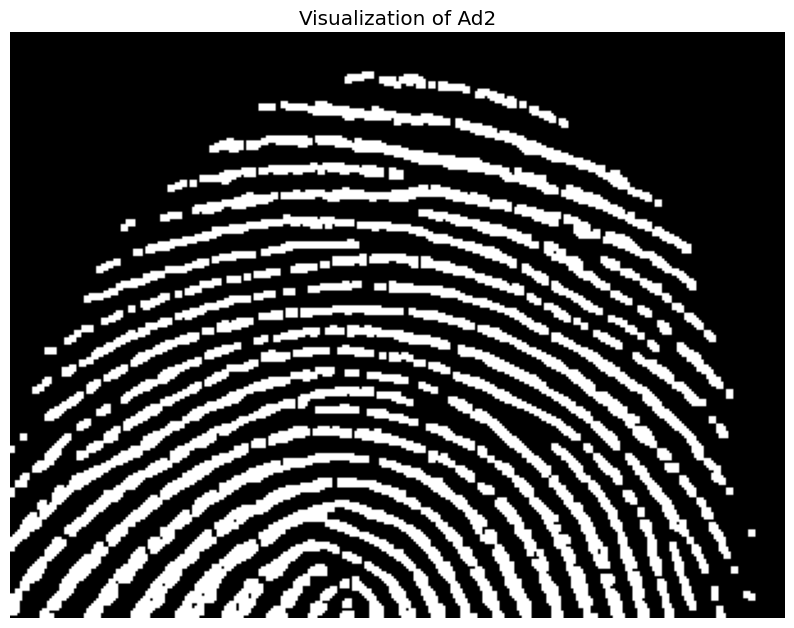

In [9]:
# define Ad2 as the morphological opening of image A by B
Ad2=skimage.morphology.binary_opening(A,B)

# display Ad2
plt.figure(figsize=(10, 8)) 
plt.imshow(Ad2, cmap='gray')
plt.axis('off')
plt.title('Visualization of Ad2')
plt.show()

We compute the maximum of the absolute difference between <b>Ad1</b> and <b>Ad2</b> and printing this value to the command window.

In [10]:
Diff=Ad1.astype(int)-Ad2.astype(int)
absolute=np.absolute(Diff)
print("The maximum of absolute difference between Ad1 and Ad2 : ", absolute.max())

The maximum of absolute difference between Ad1 and Ad2 :  0


As the maximum of absolute difference between <b>Ad1</b> and <b>Ad2</b> is zero, <b>Ad1</b> and <b>Ad2</b> are equivalent.

## (a-iv) Dilation:
We define <b>Ae</b> as the dilation of <b>Ad1</b> by structuring element <b>B</b> and display <b>Ae</b>, which corresponds to Figure 9.11(e) of textbook.

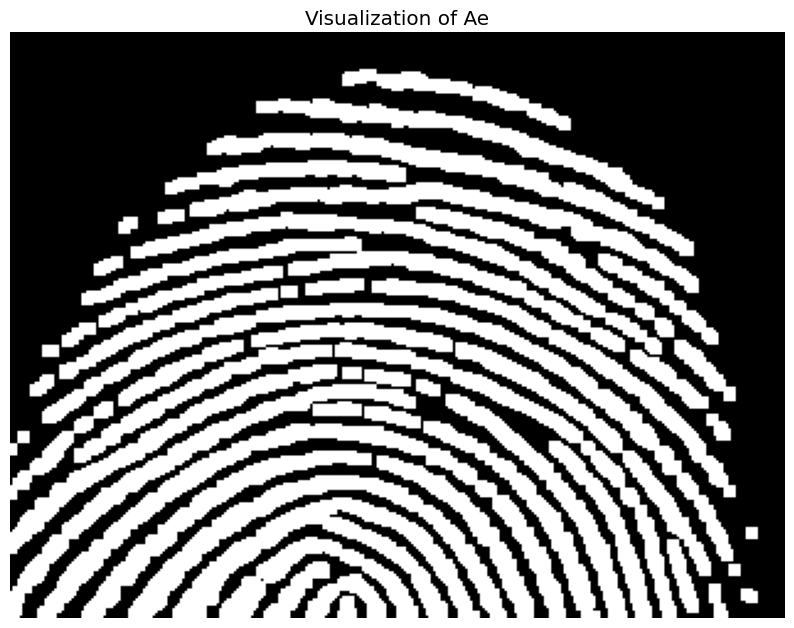

In [11]:
# define Ae as the dilation of Ad1 by B
Ae=skimage.morphology.binary_dilation(Ad1,B)

# display Ae
plt.figure(figsize=(10, 8)) 
plt.imshow(Ae, cmap='gray')
plt.axis('off')
plt.title('Visualization of Ae')
plt.show()

## (a-v) Erosion and Closing:
We define <b>Af1</b> as the erosion of <b>Ae</b> by structuring element <b>B</b> and display <b>Af1</b>, which corresponds to Figure 9.11(f) of textbook.

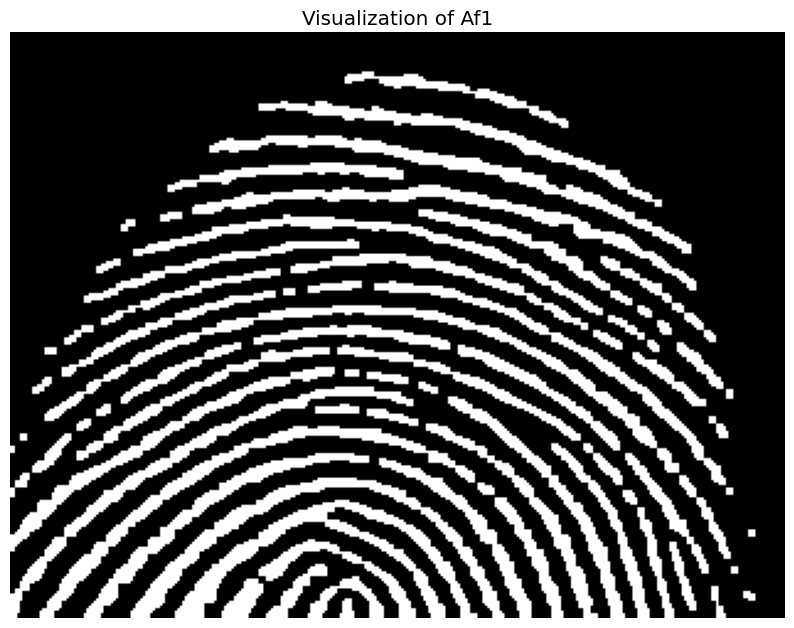

In [12]:
# define Af1 as the erosion of Ae by B 
Af1=skimage.morphology.binary_erosion(Ae,B)
# display Af1
plt.figure(figsize=(10, 8)) 
plt.imshow(Af1, cmap='gray')
plt.axis('off')
plt.title('Visualization of Af1')
plt.show()

We define <b>Af2</b> as the morphological closing of <b>Ad1</b> by structuring element <b>B</b> and display image <b>Af2</b>, which also correspond to Figure 9.11(f) of textbook.

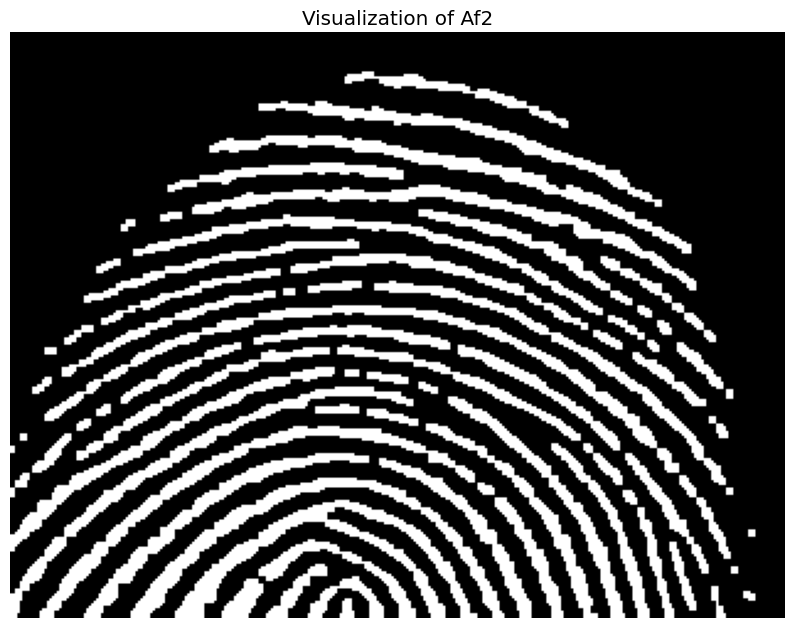

In [13]:
# define Af2 as the morphological closing of Ad1 by B 

Af2=skimage.morphology.binary_closing(Ad1,B)

# display Af2
plt.figure(figsize=(10, 8)) 
plt.imshow(Af2, cmap='gray')
plt.axis('off')
plt.title('Visualization of Af2')
plt.show()

We compute the maximum of the absolute difference between <b>Af1</b> and <b>Af2</b> and printing this value to the command window

In [14]:
Diff=Af1.astype(int)-Af2.astype(int)
absolute=np.absolute(Diff)
print("The maximum of absolute difference between Af1 and Af2 : ", absolute.max())

The maximum of absolute difference between Af1 and Af2 :  0


As the maximum of absolute difference between Af1 and Af2 is zero, Af1 and Af2 are equivalent.

## (a-vi) Removing Holes: 
We fill the holes in image A with the command <b>skimage.morphology.remove_small_holes</b>. We call the 
resulting image <b>Ag</b> and display that image.

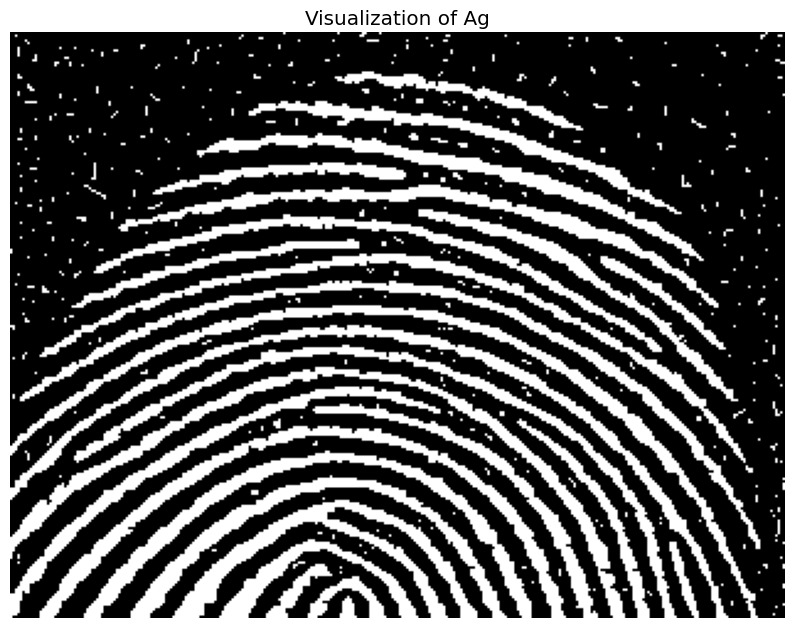

In [15]:
# converting A to Boolean array
nump_array = np.array(A,dtype='bool')

# fill the holes in image A
Ag=skimage.morphology.remove_small_holes(nump_array)

# display Ag
plt.figure(figsize=(10, 8)) 
plt.imshow(Ag, cmap='gray')
plt.axis('off')
plt.title('Visualization of Ag')
plt.show()

## (a-vii) Removing Small Regions:
We remove small isolated foreground regions from <b>Ag</b> with the command <b>skimage.morphology.remove_small_objects</b>. We choose an appropriate value of <b>area_threshold=15</b> to remove the isolated regions in <b>Ag</b> but not any valid fingerprint ridges. We call the resulting image <b>Ah</b> and display that image. The displayed image shows a satisfactory result of removing isolated foreground regions.

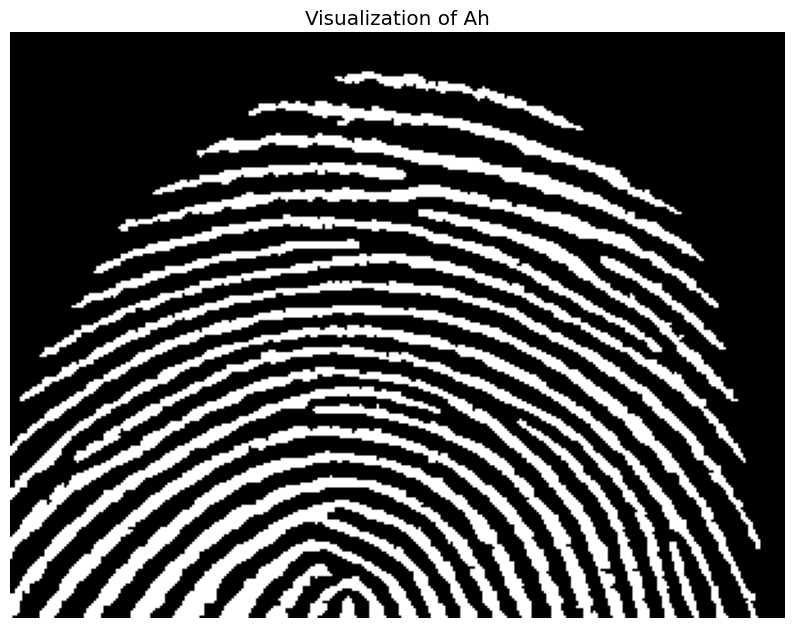

In [16]:
Ah=skimage.morphology.remove_small_objects(Ag, 15)

# display Ah
plt.figure(figsize=(10, 8)) 
plt.imshow(Ah, cmap='gray')
plt.axis('off')
plt.title('Visualization of Ah')
plt.show()

## (b) Fingerprint Enhancement and Binarization
In this part, we enhance and binarize the fingerprint images that we will use in this project. We download Database 1 (DB1) from the FVC2000 fingerprint recognition competition (http://bias.csr.unibo.it/fvc2000/Downloads/DB1_B.zip). We use python translation of Peter Kovesi’s Matlab implementation (https://www.peterkovesi.com/matlabfns/#fingerprints) of the hong1998 fingerprint
enhancement algorithm , available at https://github.com/Utkarsh-Deshmukh/Fingerprint-EnhancementPython to enhance and binarize the fingerprint images of DB1 dataset.

To test the code, we read <b>101_1.tif</b> image into variable <b>I</b>. We enhance and binarize <b>I</b> using <b>image_enhance</b> function.  

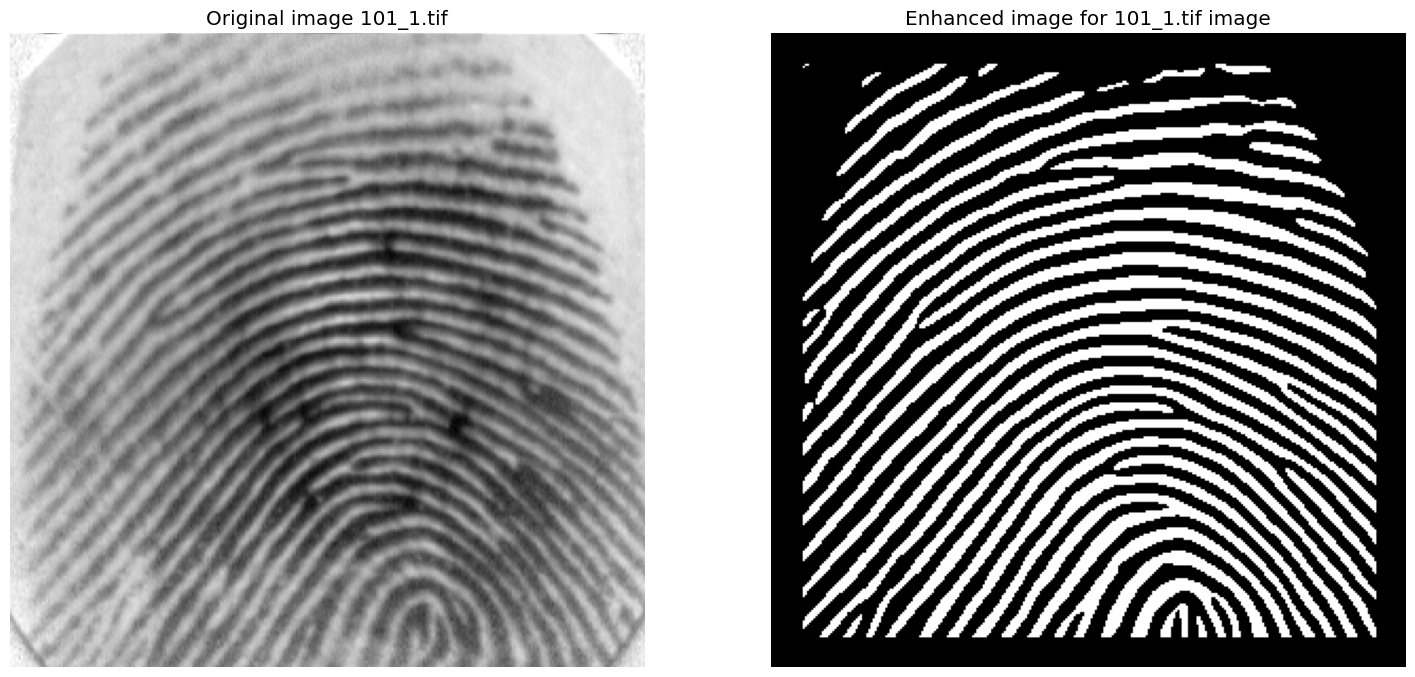

In [17]:
I=imageio.imread('101_1.tif')
I_bin=image_enhance(I)

# Displaying the images
plt.figure(figsize=(18, 15))  
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.imshow(I, cmap = 'gray')
plt.axis('off')
plt.title('Original image 101_1.tif')


plt.subplot(1, 2, 2) # (rows, columns, panel number)
plt.imshow(I_bin, cmap='gray')
plt.axis('off')
plt.title('Enhanced image for 101_1.tif image')
plt.show()

It is obvious that the original image <b>101_1.tif</b> requires a enhancement for fingerprint recognition and the <b>image_enhance</b> function enhances and binarizes it properly as shown as <b>Enhanced image for 101_1.tif image</b>.

## (b-i) Code License Terms
We read the license of the code at https://github.com/Utkarsh-Deshmukh/FingerprintEnhancement-Python/blob/master/LICENSE). The license allows us to modify the code. There are no limitations on the modifications we can make. We can post or redistribute our code which includes the original or modified code if we meet the conditions provided in the license file (a) the provided disclaimer, list of conditions, and the copyright notice must be retained while redistributing the source code (b) the provided disclaimer in the documentation and/or other materials provided with the distribution, list of conditions, and the copyright notice must be retained while redistributing the binary form of code. To clearly note our use and/or modification of the code within this assignment, we need to include the license file link in our assignment. To post our assignment code on the internet, we need to fulfill the two conditions of redistribute of our code as discussed before. The copyright holder or contributors will not be liable for any damage caused by using the code with or without modification.




## (b-ii) Generate Binary Images:
We loop over all 80 images in the DB1 dataset, compute the binary image, and write it out to a folder called
<b>DB1_B_binary/</b>. We also keep track of how long it takes the code to operate on all 80 images.

In [18]:
image_directory = 'DB1_B/'
image_filenames = sorted(glob.glob(image_directory+'*.tif'))  
begin_time1=time.time()

# loop over all 80 images
for f,image_filename in enumerate(image_filenames):
    binary_filename = os.path.basename(image_filename)[:-4]
    I=imageio.imread(image_filename)
    # enhancing image I
    I_binary=image_enhance(I)
    img = I_binary.astype(np.uint8)
    image = imageio.imwrite('DB1_B_binary/' + binary_filename + '.tif', img)
total_time = time.time() - begin_time1
print("The time it took: ", total_time, "seconds")

The time it took:  208.29213905334473 seconds


We display the original <b>101_1.tif</b> image and the binarized version of the image.

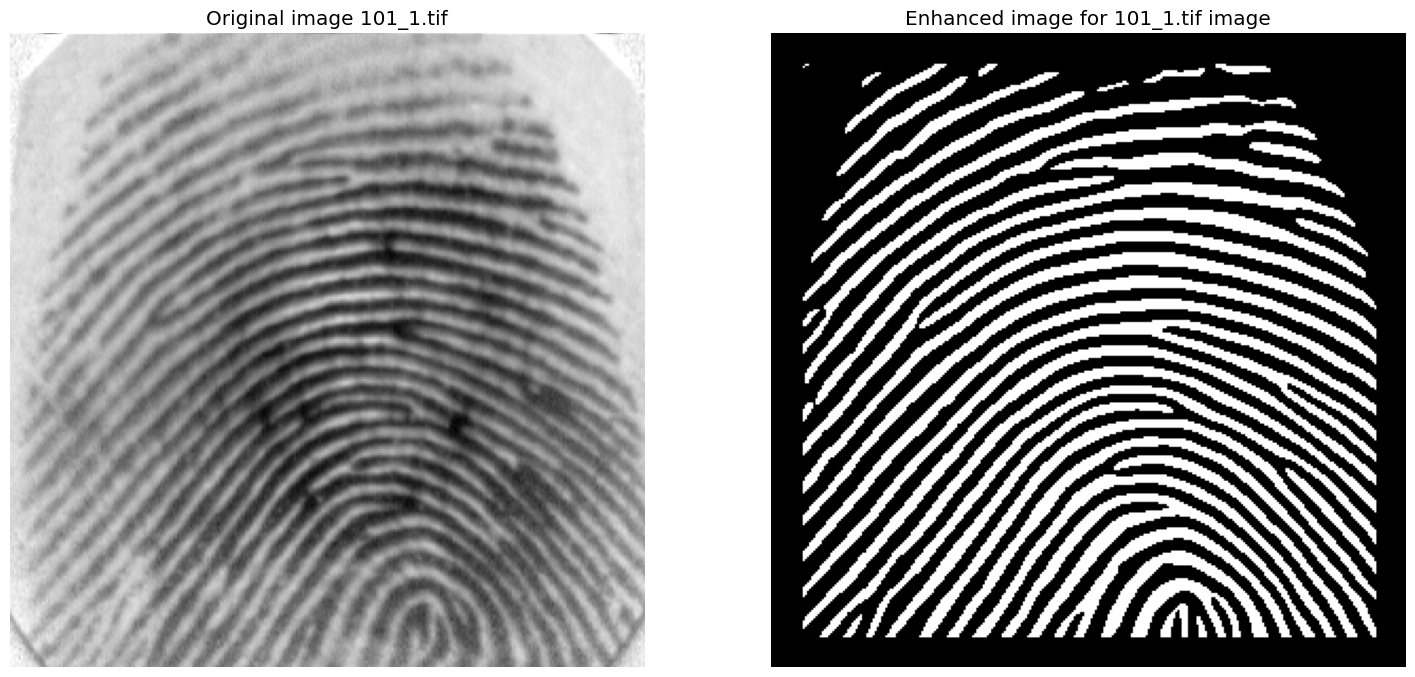

In [19]:
I=imageio.imread('101_1.tif')
A = imageio.imread('DB1_B_binary/101_1.tif')


# Displaying the images
plt.figure(figsize=(18, 15))  
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.imshow(I, cmap = 'gray')
plt.axis('off')
plt.title('Original image 101_1.tif')

plt.subplot(1, 2, 2) # (rows, columns, panel number)
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.title('Enhanced image for 101_1.tif image')
plt.show()



It is obvious that the code enhances and binarizes the original image properly, where fingerprint ridges are coded as foreground (white) and valleys as background (black).

## (c) Minutiae Extraction
In this part, we extract minutiae from the binarized fingerprint images generated in part (b). This part
follows the basic concepts of the bansal2010.pdf paper with some modifications.

## (c-i) Morphological Preprocessing:

## Spur Removal:
In this step, we remove isolated 8-connected pixels using <b>skimage.morphology.remove_small_objects</b> with connectivity 1 and min_size=2.

In [20]:
A1 = np.array(A,dtype='bool')
I1011_spur1=skimage.morphology.remove_small_objects(A1, 2, connectivity=1)

Diff=A1.astype(int)-I1011_spur1.astype(int)
absol=np.absolute(Diff)


print("Number of pixels removed from I1011: ", np.sum(absol))

Number of pixels removed from I1011:  1


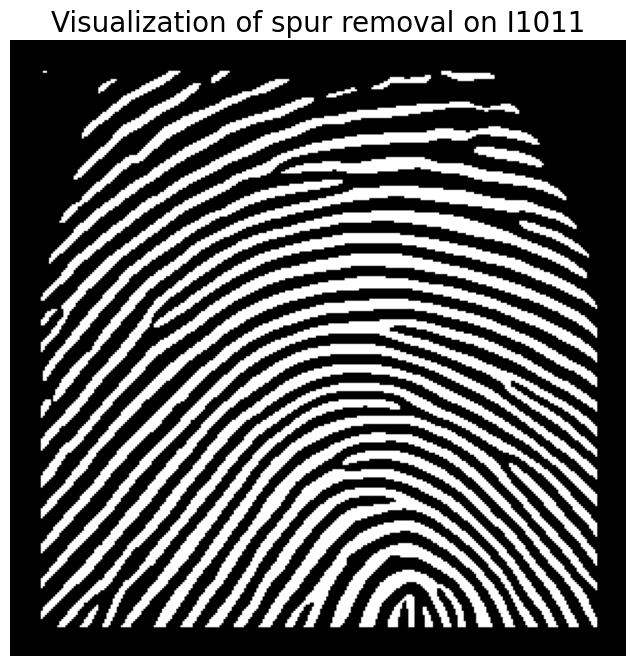

In [21]:
plt.figure(figsize=(10, 8))  
plt.imshow(I1011_spur1, cmap = 'gray')
plt.axis('off')
plt.title('Visualization of spur removal on I1011', fontsize = 20)
plt.show()

We apply spur removal across all 80 dataset images, and report on the total number of images for which any spur pixels are removed and the total number of spur pixels removed from the dataset.

In [22]:
image_directory = 'DB1_B_binary/'
image_filenames = sorted(glob.glob(image_directory+'*.tif'))  
a=[]
for f,image_filename in enumerate(image_filenames):
    binary_filename = os.path.basename(image_filename)[:-4]
    I=imageio.imread(image_filename)
    A1 = np.array(I,dtype='bool')
    I1011_spur=skimage.morphology.remove_small_objects(A1, 2, connectivity=1)
    Diff=A1.astype(int)-I1011_spur.astype(int)
    absol=np.absolute(Diff)
    total=np.sum(absol)
    a.append(total)
    img = I1011_spur.astype(np.uint8)
    image = imageio.imwrite('DB1_B_spur/' + binary_filename + '.tif', img)
    
    
total_pixels=sum(a)
total_image=np.count_nonzero(a)
print("Total number of dataset images that had atleast one spur pixel removed: ", total_image)
print("The total number of spur pixels removed from the dataset: ", total_pixels)


Total number of dataset images that had atleast one spur pixel removed:  77
The total number of spur pixels removed from the dataset:  833


We find that total number of removed spur pixels is 833, which is quite big and 77 images out of 80 images in dataset contain spur pixels. If we do not remove these spur pixels, it will badly affect the fingerprint verification performance. Thus, spur removal seems very important process.

## Hole Removal:
In this step, we remove small holes in the binarized fingerprint images. Firstly, we use  <b>skimage.morphology.remove_small_holes</b> on <b>I1011</b> to remove small holes and display the binary image after hole removal. For I1011, we also display a count of pixels that were filled by the hole removal operation.

In [23]:
A = imageio.imread('DB1_B_spur/101_1.tif')
A1 = np.array(A,dtype='bool')
# fill the holes in image A1
I1011_hole1=skimage.morphology.remove_small_holes(A1)
Diff=I1011_hole1.astype(int)-A1.astype(int)
absol=np.absolute(Diff)
print("Number of pixels filled in the processing of I1011: ", np.sum(absol))

Number of pixels filled in the processing of I1011:  0


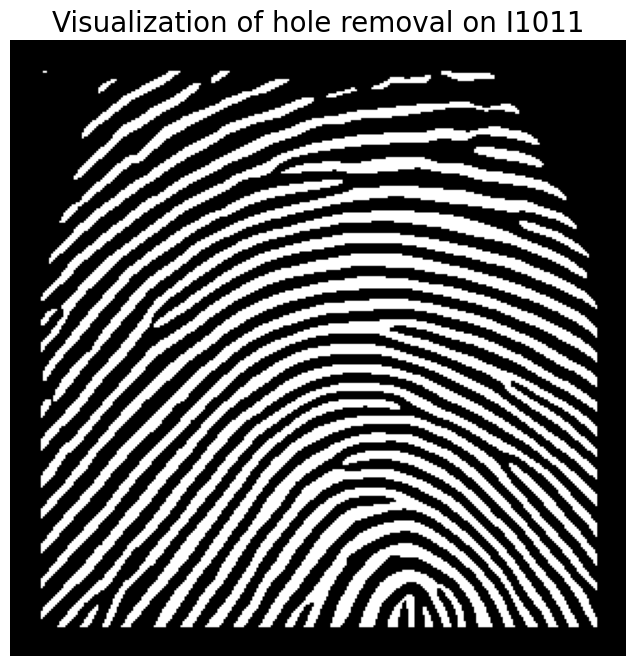

In [24]:
plt.figure(figsize=(10, 8))  
plt.imshow(I1011_hole1, cmap = 'gray')
plt.axis('off')
plt.title('Visualization of hole removal on I1011', fontsize = 20)
plt.show()

We apply the hole removal across all 80 dataset images, and report on the total number of images for
which any hole pixels were filled and the total number of hole pixels filled from all the images.

In [25]:
image_directory = 'DB1_B_spur/'
image_filenames = sorted(glob.glob(image_directory+'*.tif'))  
a=[]
for f,image_filename in enumerate(image_filenames):
    binary_filename = os.path.basename(image_filename)[:-4]
    I=imageio.imread(image_filename)
    A1 = np.array(I,dtype='bool')
    I1011_hole=skimage.morphology.remove_small_holes(A1)
    Diff=I1011_hole.astype(int)-A1.astype(int)
    absol=np.absolute(Diff)
    total=np.sum(absol)
    a.append(total)
    img = I1011_hole.astype(np.uint8)
    image = imageio.imwrite('DB1_B_hole/' + binary_filename + '.tif', img)
    
    
total_pixels=sum(a)
total_image=np.count_nonzero(a)
print("Total number of dataset images that had at least one hole pixel filled ", total_image)
print("Total number of hole pixels filled in the dataset: ", total_pixels)

Total number of dataset images that had at least one hole pixel filled  43
Total number of hole pixels filled in the dataset:  1474


We find that total number of hole pixels filled in the dataset is 1474 from 43 images. If we do not remove these holes, it may badly affect the fingerprint verification performance. Thus, hole filling seems very important process.

## Island Removal:
In this step, we eliminates any spurious dots and islands from the binarized images. To do that, we use <b>skimage.morphology.remove_small_objects</b> with min_size=9. We use different min_size for fingerprint images and find that min_size=9 does a satisfactory performance on island removal of the binary fingerprint images. Firstly, we perform island removal operation on I1011. 

In [26]:
A = imageio.imread('DB1_B_hole/101_1.tif')
A1 = np.array(A,dtype='bool')

I1011_island1=skimage.morphology.remove_small_objects(A1,9)

Diff=A1.astype(int)-I1011_island1.astype(int)
absol=np.absolute(Diff)
print("Number of pixels that removed by the island removal for I1011: ", np.sum(absol))

Number of pixels that removed by the island removal for I1011:  2


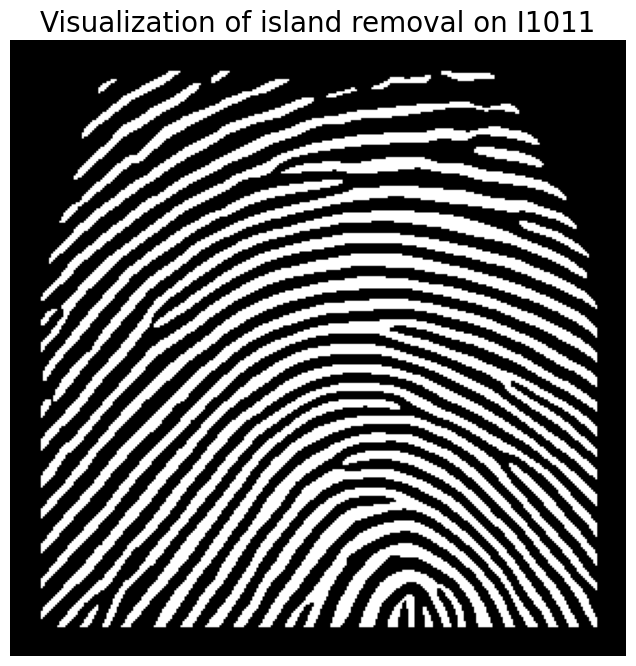

In [27]:
plt.figure(figsize=(10, 8))  
plt.imshow(I1011_island1, cmap = 'gray')
plt.axis('off')
plt.title('Visualization of island removal on I1011', fontsize = 20)
plt.show()

We can easily find that the dot in left upper corner for <b>I1011</b> is removed after island removal.

We apply the island removal across all 80 dataset images, and report on the total number of images for which any island pixels were removed and the total number of island pixels removed from all the images.

In [28]:
image_directory = 'DB1_B_hole/'
image_filenames = sorted(glob.glob(image_directory+'*.tif'))  
a=[]
for f,image_filename in enumerate(image_filenames):
    binary_filename = os.path.basename(image_filename)[:-4]
    I=imageio.imread(image_filename)
    A1 = np.array(I,dtype='bool')
    I1011_island=skimage.morphology.remove_small_objects(A1,9)
    Diff=A1.astype(int)-I1011_island.astype(int)
    absol=np.absolute(Diff)
    total=np.sum(absol)
    a.append(total)
    img = I1011_island.astype(np.uint8)
    image = imageio.imwrite('DB1_B_island/' + binary_filename + '.tif', img)
    
    
total_pixels=sum(a)
total_image=np.count_nonzero(a)
print("Total number of dataset images for which any island pixel were removed: ", total_image)
print("Total number of island pixels removed in the dataset: ", total_pixels)

Total number of dataset images for which any island pixel were removed:  77
Total number of island pixels removed in the dataset:  3468


We find that total 3468 island pixels are removed from the dataset, which is a very large number. Thus, island removal is very important for a better fingerprint matching process.

## (c-ii) Thinning
In this section, we use <b>skimage.morphology.thin</b> to compute the thinned (skeleton) image. We choose the default <b>max_iter=None</b> to allow the algorithm to run to convergence. Firstly, we apply the thinning operation on <b>I1011</b>.

In [29]:
A = imageio.imread('DB1_B_island/101_1.tif')
A1 = np.array(A,dtype='bool')
I1011_thin1=skimage.morphology.thin(A1, max_num_iter=None)

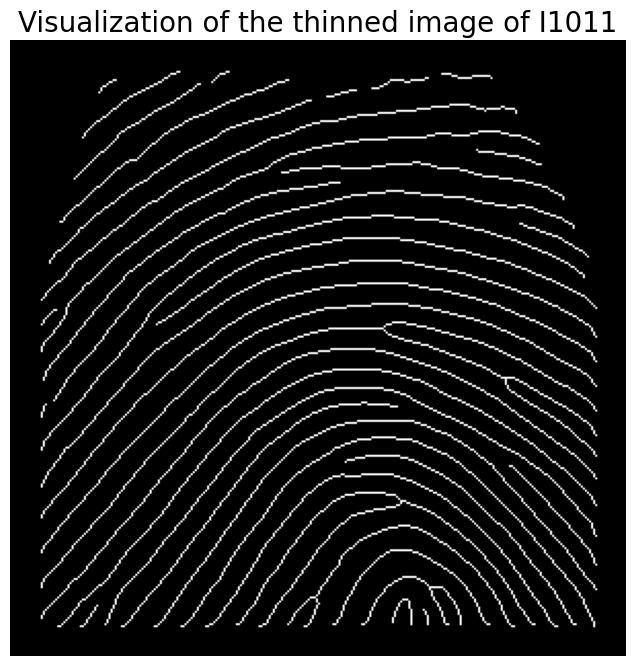

In [30]:
plt.figure(figsize=(10, 8))  
plt.imshow(I1011_thin1, cmap = 'gray')
plt.axis('off')
plt.title('Visualization of the thinned image of I1011', fontsize = 20)
plt.show()

In [31]:
Percent=(np.sum(I1011_thin1)/np.sum(A1))*100
print("Percentage of foreground pixels remaining for I1011: ", Percent)

Percentage of foreground pixels remaining for I1011:  19.37971611873816


We apply the thinning across all 80 dataset images and report on the total percentage of pixels remaining compared to those pixels that survived part (c-i).

In [32]:
image_directory = 'DB1_B_island/'
image_filenames = sorted(glob.glob(image_directory+'*.tif'))  
a_thin=[]
b_pre=[]
for f,image_filename in enumerate(image_filenames):
    binary_filename = os.path.basename(image_filename)[:-4]
    I=imageio.imread(image_filename)
    A1 = np.array(I,dtype='bool')
    I1011_thin=skimage.morphology.thin(A1, max_num_iter=None)
    thin_pixels=np.sum(I1011_thin)
    previous_pixels=np.sum(A1)
    a_thin.append(thin_pixels)
    b_pre.append(previous_pixels)
    img = I1011_thin.astype(np.uint8)
    image = imageio.imwrite('DB1_B_thin/' + binary_filename + '.tif', img)
    
    
total_thin_pixels=sum(a_thin)
total_prev_pixels=sum(b_pre)
Percent=(total_thin_pixels/total_prev_pixels)*100
print("Percentage of foreground pixels remaining for the dataset: ", Percent)

Percentage of foreground pixels remaining for the dataset:  23.974568526687232


Percentage of foreground pixels remaining in the dataset is 23.97. From this value, we can say that thinning process does a satisfactory job on the dataset. 

## (c-iii) Minutiae Extraction—Ridge Endings (REs): 
We define the eight foreground and eight background structuring elements (strels) for detection of REs as described in the bansal2010 paper.

In [33]:
RE11 = np.array([[0, 1, 0], [0, 1, 0], [0, 0, 0]], dtype = bool)
RE12 = np.array([[0, 0, 0], [0, 1, 1], [0, 0, 0]], dtype = bool)
RE13 = np.array([[0, 0, 0], [0, 1, 0], [0, 1, 0]], dtype = bool)
RE14 = np.array([[0, 0, 0], [1, 1, 0], [0, 0, 0]], dtype = bool)
RE15 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]], dtype = bool)
RE16 = np.array([[0, 0, 1], [0, 1, 0], [0, 0, 0]], dtype = bool)
RE17 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 1]], dtype = bool)
RE18 = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0]], dtype = bool)
RE21 = (1 - RE11).astype(bool)
RE22 = (1 - RE12).astype(bool)
RE23 = (1 - RE13).astype(bool)
RE24 = (1 - RE14).astype(bool)
RE25 = (1 - RE15).astype(bool)
RE26 = (1 - RE16).astype(bool)
RE27 = (1 - RE17).astype(bool)
RE28 = (1 - RE18).astype(bool)

Using each pair of strels (RE1k , RE2k) , we compute the eight HMT outputs using <b>scipy.ndimage.binary_hit_or_miss</b> for <b>I1011</b> and combine those outputs using union (logical OR) to generate an image <b>I_RE</b> consisting of all REs detected in <b>I1011</b>.

In [34]:
A = imageio.imread('DB1_B_thin/101_1.tif')
A1 = np.array(A,dtype='bool')

HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RE11, RE21)
HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RE12, RE22)
HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RE13, RE23)
HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RE14, RE24)
HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RE15, RE25)
HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RE16, RE26)
HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RE17, RE27)
HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RE18, RE28)

I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18))
location=np.nonzero(I_RE)

We plot the locations of all the REs in <b>I_RE</b> as red x’s on top of the skeleton image of <b>I1011</b>. We also compute and display how many REs were detected in <b>I1011<b>.

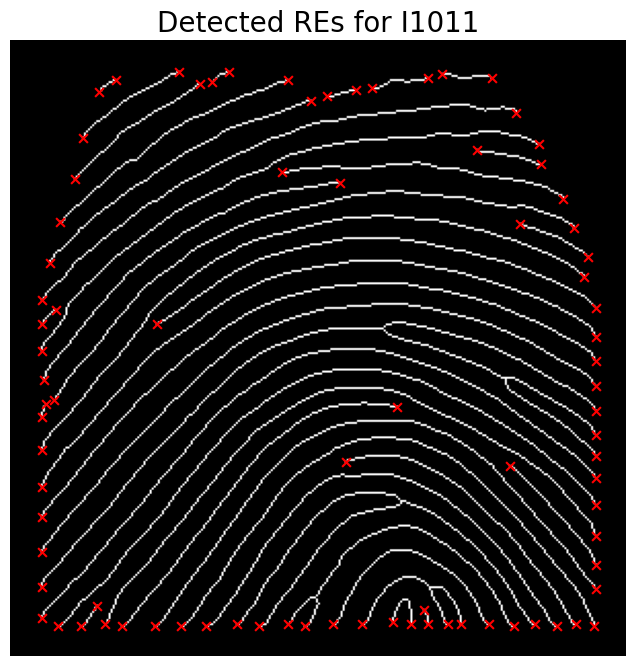

In [35]:
plt.figure(figsize=(10, 8))  
plt.imshow(A1, cmap = 'gray')
plt.scatter(location[1],location[0], c='red', marker = "x", s = 40)
plt.axis('off')
plt.title('Detected REs for I1011', fontsize = 20)
plt.show()


In [36]:
print('Number of REs detected in I1011: ',len(location[0]))


Number of REs detected in I1011:  85


We remove spurious REs at the edge of the detected ridge area using a simple masking operation. The image mask is multiplied by <b>I_RE</b> to remove those extraneous REs.

In [37]:
# defining mask 
mask = np.zeros((300,300))
l1=min(location[1])+2
l2=max(location[1])-2
l3=min(location[0])+2
l4=max(location[0])-2
mask[l1:l2, l3:l4]=1

mask_I_RE=I_RE*mask
location_mask=np.nonzero(mask_I_RE)

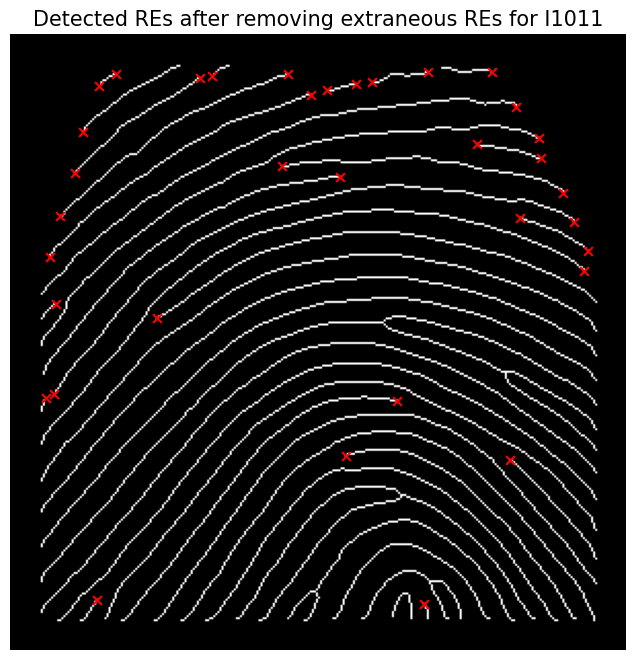

In [38]:
plt.figure(figsize=(10, 8))  
plt.imshow(A1, cmap = 'gray')
plt.scatter(location_mask[1],location_mask[0], c='red', marker = "x", s = 40)
plt.axis('off')
plt.title('Detected REs after removing extraneous REs for I1011', fontsize = 15)
plt.show()

In [39]:
print('Number of REs remain in I1011 after removing extraneous REs: ', len(location_mask[0]))

Number of REs remain in I1011 after removing extraneous REs:  35


By observing the above Figure of <b>I1011</b> with removing extraneous REs, we find that the algorithm appears to have detected almost all of the valid REs, although one RE in upper right is not detected. The algorithm appear to have detected a little number of spurious REs as at the right side of the image. 

We apply the same process of RE detection to all 80 dataset images and report on the following
statistics: the average, minimum, and maximum number of REs detected in the dataset images.

In [40]:
image_directory = 'DB1_B_thin/'
image_filenames = sorted(glob.glob(image_directory+'*.tif'))  
a=[]

for f,image_filename in enumerate(image_filenames):
    binary_filename = os.path.basename(image_filename)[:-4]
    I=imageio.imread(image_filename)
    A1 = np.array(I,dtype='bool')
    HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RE11, RE21)
    HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RE12, RE22)
    HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RE13, RE23)
    HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RE14, RE24)
    HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RE15, RE25)
    HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RE16, RE26)
    HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RE17, RE27)
    HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RE18, RE28)
    I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18))
    location=np.nonzero(I_RE)
    mask = np.zeros((300,300))
    l1=min(location[1])+2
    l2=max(location[1])-2
    l3=min(location[0])+2
    l4=max(location[0])-2
    mask[l1:l2, l3:l4]=1
    mask_I_RE=I_RE*mask
    location_mask=np.nonzero(mask_I_RE)
    a.append(len(location_mask[0]))
    
    
    
min_RE=np.min(a)
max_RE=np.max(a)
mean_RE=np.mean(a)
print("Minimum number of REs detected in dataset images: ", min_RE)
print("Maximum number of REs detected in dataset images: ", max_RE)
print("Average number of REs detected in dataset images: ", mean_RE)

Minimum number of REs detected in dataset images:  15
Maximum number of REs detected in dataset images:  352
Average number of REs detected in dataset images:  96.6625


## (c-iv) Minutiae Extraction—Ridge Bifurcations (RB):
We define the eight foreground and eight background strels for detection of RBs as described in the bansal2010 paper. 

In [41]:
RB11 = np.array([[0, 0, 1], [1, 1, 0], [0, 0, 1]], dtype = bool)
RB12 = np.array([[0, 1, 0], [0, 1, 0], [1, 0, 1]], dtype = bool)
RB13 = np.array([[1, 0, 0], [0, 1, 1], [1, 0, 0]], dtype = bool)
RB14 = np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]], dtype = bool)
RB15 = np.array([[0, 1, 0], [0, 1, 1], [1, 0, 0]], dtype = bool)
RB16 = np.array([[1, 0, 0], [0, 1, 1], [0, 1, 0]], dtype = bool)
RB17 = np.array([[0, 0, 1], [1, 1, 0], [0, 1, 0]], dtype = bool)
RB18 = np.array([[0, 1, 0], [1, 1, 0], [0, 0, 1]], dtype = bool)
RB21 = (1 - RB11).astype(bool)
RB22 = (1 - RB12).astype(bool)
RB23 = (1 - RB13).astype(bool)
RB24 = (1 - RB14).astype(bool)
RB25 = (1 - RB15).astype(bool)
RB26 = (1 - RB16).astype(bool)
RB27 = (1 - RB17).astype(bool)
RB28 = (1 - RB18).astype(bool)

Using each pair of strels (<b>RB1k</b> , <b>RB2k</b>), we compute the eight HMT outputs using
<b>scipy.ndimage.binary_hit_or_miss</b> for <b>I1011</b> and combine those outputs using union (logical OR) to generate an image <b>I_RB</b> consisting of all RBs.

In [42]:
A = imageio.imread('DB1_B_thin/101_1.tif')
A1 = np.array(A,dtype='bool')

HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RB11, RB21)
HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RB12, RB22)
HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RB13, RB23)
HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RB14, RB24)
HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RB15, RB25)
HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RB16, RB26)
HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RB17, RB27)
HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RB18, RB28)

I_RB=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18))
location=np.nonzero(I_RB)

We determine and plot the locations of all the RBs in I_RB as yellow circles on top of the skeleton image of <b>I1011</b>. We compute and display how many RBs were detected in <b>I1011</b>.

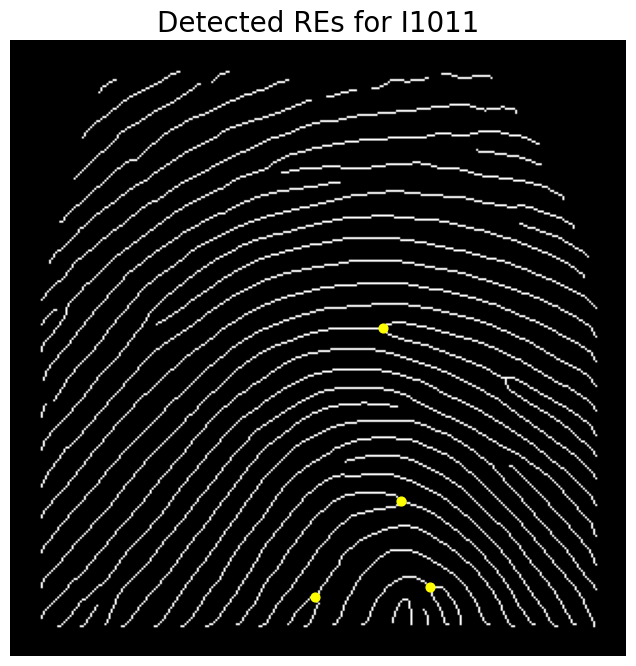

In [43]:
plt.figure(figsize=(10, 8))  
plt.imshow(A1, cmap = 'gray')
plt.scatter(location[1],location[0], c='yellow', marker = 'o', s = 40)
plt.axis('off')
plt.title('Detected REs for I1011', fontsize = 20)
plt.show()

In [44]:
print('Number of RBs detected in I1011: ',len(location[0]))

Number of RBs detected in I1011:  4


The algorithm does not appear to have detected all valid RBs in <b>I1011</b>. We can see that one valid RB is not detected for <b>I1011</b>. The algorithm does not appear to have detected any spurious RBs for <b>I1011</b>.

We apply the same process of RB detection to all 80 dataset images and report on the following statistics: the average, minimum, and maximum number of RBs detected in the dataset images

In [45]:
image_directory = 'DB1_B_thin/'
image_filenames = sorted(glob.glob(image_directory+'*.tif'))  
a=[]

for f,image_filename in enumerate(image_filenames):
    binary_filename = os.path.basename(image_filename)[:-4]
    I=imageio.imread(image_filename)
    A1 = np.array(I,dtype='bool')
    HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RB11, RB21)
    HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RB12, RB22)
    HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RB13, RB23)
    HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RB14, RB24)
    HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RB15, RB25)
    HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RB16, RB26)
    HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RB17, RB27)
    HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RB18, RB28)
    I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18))
    location=np.nonzero(I_RE)
    a.append(len(location[0]))
    
    
    
min_RB=np.min(a)
max_RB=np.max(a)
mean_RB=np.mean(a)
total_RB_before=sum(a)
print('Total number of RBs detected:', total_RB_before)
print("Minimum number of RBs detected in dataset images: ", min_RB)
print("Maximum number of RBs detected in dataset images: ", max_RB)
print("Average number of RBs detected in dataset images: ", mean_RB)

Total number of RBs detected: 797
Minimum number of RBs detected in dataset images:  3
Maximum number of RBs detected in dataset images:  23
Average number of RBs detected in dataset images:  9.9625


We have noticed that not all RBs are detected since not all RBs follow the angles modeled by
the eight strels in bansal2010. We define 8 additional strels that are capable of detecting those missed
RBs. By carefully observing upper structuring elements of Figure 12, we find that there is two basic pattern of structuring elements in the upper part of the Figure 12. If we take any structuring element with a specific pattern, and rotate it 90 degree 3 times, for each rotation we can get new structuring element. For 2 basic pattern structures with rotation of 90 degree three times can provide us total 8 structuring elements. For finding the additional structing elements, we find two basic pattern directions where the RBs are not detected. After that we rotate each pattern structure 3 times with 90 degree to get the additional 8 structuring elements.   

In [46]:
RB11 = np.array([[0, 0, 1], [1, 1, 0], [0, 0, 1]], dtype = bool)
RB12 = np.array([[0, 1, 0], [0, 1, 0], [1, 0, 1]], dtype = bool)
RB13 = np.array([[1, 0, 0], [0, 1, 1], [1, 0, 0]], dtype = bool)
RB14 = np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]], dtype = bool)
RB15 = np.array([[0, 1, 0], [0, 1, 1], [1, 0, 0]], dtype = bool)
RB16 = np.array([[1, 0, 0], [0, 1, 1], [0, 1, 0]], dtype = bool)
RB17 = np.array([[0, 0, 1], [1, 1, 0], [0, 1, 0]], dtype = bool)
RB18 = np.array([[0, 1, 0], [1, 1, 0], [0, 0, 1]], dtype = bool)

#Define additional strels
RB31 = np.array([[0, 0, 0], [1, 1, 1], [0, 1, 0]], dtype = bool)
RB32 = np.array([[0, 1, 0], [1, 1, 1], [0, 0, 0]], dtype = bool)
RB33 = np.array([[0, 1, 0], [0, 1, 1], [0, 1, 0]], dtype = bool)
RB34 = np.array([[0, 1, 0], [1, 1, 0], [0, 1, 0]], dtype = bool)
RB35 = np.array([[1, 0, 1], [0, 1, 0], [0, 0, 1]], dtype = bool)
RB36 = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 0]], dtype = bool)
RB37 = np.array([[1, 0, 0], [0, 1, 0], [1, 0, 1]], dtype = bool)
RB38 = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 1]], dtype = bool)


RB21 = (1 - RB11).astype(bool)
RB22 = (1 - RB12).astype(bool)
RB23 = (1 - RB13).astype(bool)
RB24 = (1 - RB14).astype(bool)
RB25 = (1 - RB15).astype(bool)
RB26 = (1 - RB16).astype(bool)
RB27 = (1 - RB17).astype(bool)
RB28 = (1 - RB18).astype(bool)

RB41 = (1 - RB31).astype(bool)
RB42 = (1 - RB32).astype(bool)
RB43 = (1 - RB33).astype(bool)
RB44 = (1 - RB34).astype(bool)
RB45 = (1 - RB35).astype(bool)
RB46 = (1 - RB36).astype(bool)
RB47 = (1 - RB37).astype(bool)
RB48 = (1 - RB38).astype(bool)

We repeat the visualization and analysis as before with additional structuring elements.

In [47]:
A = imageio.imread('DB1_B_thin/101_1.tif')
A1 = np.array(A,dtype='bool')

HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RB11, RB21)
HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RB12, RB22)
HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RB13, RB23)
HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RB14, RB24)
HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RB15, RB25)
HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RB16, RB26)
HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RB17, RB27)
HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RB18, RB28)

HMT_31=scipy.ndimage.binary_hit_or_miss(A1, RB31, RB41)
HMT_32=scipy.ndimage.binary_hit_or_miss(A1, RB32, RB42)
HMT_33=scipy.ndimage.binary_hit_or_miss(A1, RB33, RB43)
HMT_34=scipy.ndimage.binary_hit_or_miss(A1, RB34, RB44)
HMT_35=scipy.ndimage.binary_hit_or_miss(A1, RB35, RB45)
HMT_36=scipy.ndimage.binary_hit_or_miss(A1, RB36, RB46)
HMT_37=scipy.ndimage.binary_hit_or_miss(A1, RB37, RB47)
HMT_38=scipy.ndimage.binary_hit_or_miss(A1, RB38, RB48)

I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18\
                           , HMT_31,HMT_32,HMT_33,HMT_34,HMT_35,HMT_36,HMT_37,HMT_38))
location=np.nonzero(I_RE)


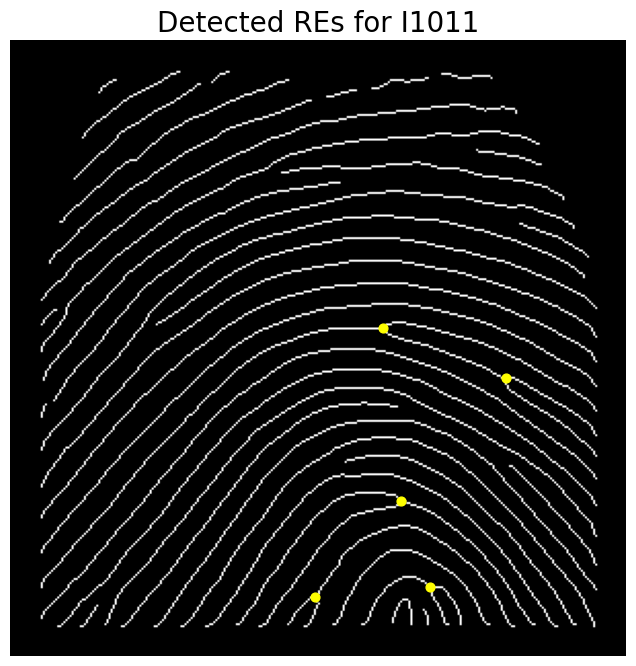

In [48]:
plt.figure(figsize=(10, 8))  
plt.imshow(A1, cmap = 'gray')
plt.scatter(location[1],location[0], c='yellow', marker = 'o', s = 40)
plt.axis('off')
plt.title('Detected REs for I1011', fontsize = 20)
plt.show()

In [49]:
print('Number of RBs detected in I1011: ',len(location[0]))

Number of RBs detected in I1011:  5


In [50]:
image_directory = 'DB1_B_thin/'
image_filenames = sorted(glob.glob(image_directory+'*.tif'))  
a=[]

for f,image_filename in enumerate(image_filenames):
    binary_filename = os.path.basename(image_filename)[:-4]
    I=imageio.imread(image_filename)
    A1 = np.array(I,dtype='bool')
    HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RB11, RB21)
    HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RB12, RB22)
    HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RB13, RB23)
    HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RB14, RB24)
    HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RB15, RB25)
    HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RB16, RB26)
    HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RB17, RB27)
    HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RB18, RB28)
    HMT_31=scipy.ndimage.binary_hit_or_miss(A1, RB31, RB41)
    HMT_32=scipy.ndimage.binary_hit_or_miss(A1, RB32, RB42)
    HMT_33=scipy.ndimage.binary_hit_or_miss(A1, RB33, RB43)
    HMT_34=scipy.ndimage.binary_hit_or_miss(A1, RB34, RB44)
    HMT_35=scipy.ndimage.binary_hit_or_miss(A1, RB35, RB45)
    HMT_36=scipy.ndimage.binary_hit_or_miss(A1, RB36, RB46)
    HMT_37=scipy.ndimage.binary_hit_or_miss(A1, RB37, RB47)
    HMT_38=scipy.ndimage.binary_hit_or_miss(A1, RB38, RB48)
    I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18\
                           , HMT_31,HMT_32,HMT_33,HMT_34,HMT_35,HMT_36,HMT_37,HMT_38))
    location=np.nonzero(I_RE)
    a.append(len(location[0]))
    
    
    
min_RB=np.min(a)
max_RB=np.max(a)
mean_RB=np.mean(a)
total_RB_after=sum(a)
add_RB_detect=total_RB_after-total_RB_before
print('Total number of RBs detected with the additional strels:', total_RB_after)
print('Additional number of RBs detected with additional strels:', add_RB_detect)
print("Minimum number of RBs detected in dataset images: ", min_RB)
print("Maximum number of RBs detected in dataset images: ", max_RB)
print("Average number of RBs detected in dataset images: ", mean_RB)

Total number of RBs detected with the additional strels: 1044
Additional number of RBs detected with additional strels: 247
Minimum number of RBs detected in dataset images:  3
Maximum number of RBs detected in dataset images:  30
Average number of RBs detected in dataset images:  13.05


We find that additional number of RBs detected with additional strels is 247. It means that if we do not include these additional structuring elements in our RB detection algorithms, it will affect the fingerprint verification performance badly.  

## (c-v) Postprocessing:
At first, we show a single image for <b>I1011</b> with REs as red x’s and RBs as yellow circles before the postprocessing.

In [51]:
A = imageio.imread('DB1_B_thin/101_1.tif')
A1 = np.array(A,dtype='bool')

HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RE11, RE21)
HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RE12, RE22)
HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RE13, RE23)
HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RE14, RE24)
HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RE15, RE25)
HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RE16, RE26)
HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RE17, RE27)
HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RE18, RE28)

I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18))
location=np.nonzero(I_RE)

mask = np.zeros((300,300))
l1=min(location[1])+2
l2=max(location[1])-2
l3=min(location[0])+2
l4=max(location[0])-2
mask[l1:l2, l3:l4]=1

mask_I_RE=I_RE*mask
location_mask_RE1=np.nonzero(mask_I_RE)

In [52]:
A = imageio.imread('DB1_B_thin/101_1.tif')
A1 = np.array(A,dtype='bool')

HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RB11, RB21)
HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RB12, RB22)
HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RB13, RB23)
HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RB14, RB24)
HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RB15, RB25)
HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RB16, RB26)
HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RB17, RB27)
HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RB18, RB28)

HMT_31=scipy.ndimage.binary_hit_or_miss(A1, RB31, RB41)
HMT_32=scipy.ndimage.binary_hit_or_miss(A1, RB32, RB42)
HMT_33=scipy.ndimage.binary_hit_or_miss(A1, RB33, RB43)
HMT_34=scipy.ndimage.binary_hit_or_miss(A1, RB34, RB44)
HMT_35=scipy.ndimage.binary_hit_or_miss(A1, RB35, RB45)
HMT_36=scipy.ndimage.binary_hit_or_miss(A1, RB36, RB46)
HMT_37=scipy.ndimage.binary_hit_or_miss(A1, RB37, RB47)
HMT_38=scipy.ndimage.binary_hit_or_miss(A1, RB38, RB48)

I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18\
                           , HMT_31,HMT_32,HMT_33,HMT_34,HMT_35,HMT_36,HMT_37,HMT_38))
location_RB1=np.nonzero(I_RE)

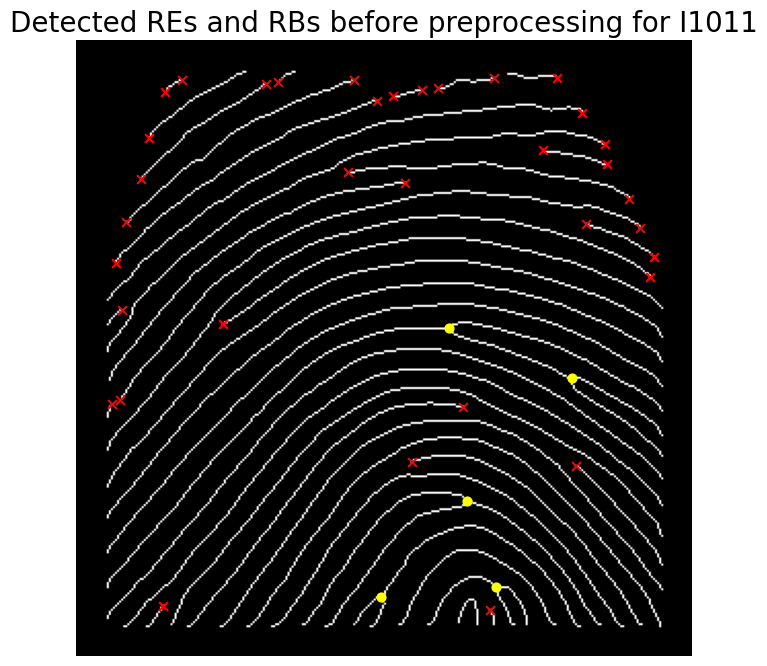

In [53]:
plt.figure(figsize=(10, 8))  
plt.imshow(A1, cmap = 'gray')
plt.scatter(location_RB1[1],location_RB1[0], c='yellow', marker = 'o', s = 40)
plt.scatter(location_mask_RE1[1],location_mask_RE1[0], c='red', marker = "x", s = 40)
plt.axis('off')
plt.title('Detected REs and RBs before preprocessing for I1011', fontsize = 20)
plt.show()

For postprocessing, we remove any minutiae (REs or RBs) that are within some distance threshold T pixels
of each other. T is related to the inter-ridge distance, and we choose T=10.7 by eye. We use the minutiae locations that for the visualizations above and compute the Euclidean distance between each pair of minutiae, storing the distances in a matrix. After that we threshold the matrix so that we can find the minutiaes, that
are far away from each other with value of atleast T. Then we find the location of the minutiaes that need to be removed. 

In [54]:
listx1=location_mask_RE1[0]
listy1=location_mask_RE1[1]
length_list_RE=len(listx1)

listx2=location_RB1[0]
listy2=location_RB1[1]

# concatenate x, y location of all REs and RBs
list_x=np.concatenate((listx1, listx2))
list_y=np.concatenate((listy1, listy2))

In [55]:
T=10.7
# Euclidean distance matrix
P=np.sqrt(np.square(list_x - list_x.reshape(-1,1)) + np.square(list_y - list_y.reshape(-1,1)))

I_G=np.zeros((P.shape[0], P.shape[1]))

# Threshold distance matrix to find minutiaes, that are far away from each other with value of atleast T
I_G=np.where(P >= T, 1, 0)

In [56]:
B=np.ones((1,len(list_x)))



In [57]:
# Keeping track of which minutiaes need to be removed
for m in range(len(list_x)):
    X=I_G[m,:]
    n_zeros = np.count_nonzero(X==0)
    if n_zeros>1:
        B[0,m]=0
    
        
        
        
            
    

In [58]:
C_RE=B[0,0:length_list_RE]
D_RB=B[0,length_list_RE:len(list_x)]

In [59]:
# removing REs 
index_RE = np.where(C_RE == 0)
arrx11 = np.delete(listx1, index_RE)
arry11 = np.delete(listy1, index_RE)

In [60]:
# removing RBs 
index_RB = np.where(D_RB == 0)
arrx22 = np.delete(listx2, index_RB)
arry22 = np.delete(listy2, index_RB)

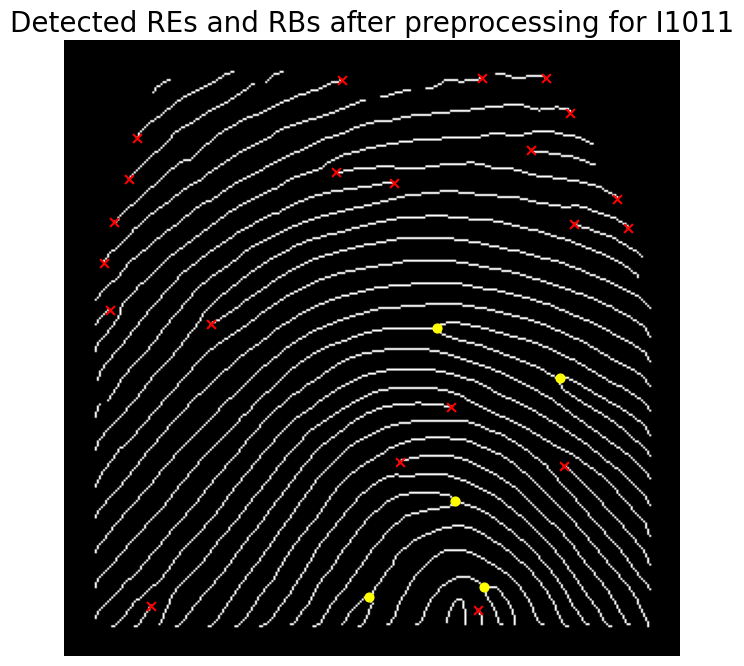

In [61]:
plt.figure(figsize=(10, 8))  
plt.imshow(A1, cmap = 'gray')
plt.scatter(arry22, arrx22, c='yellow', marker = 'o', s = 40)
plt.scatter(arry11, arrx11, c='red', marker = "x", s = 40)
plt.axis('off')
plt.title('Detected REs and RBs after preprocessing for I1011', fontsize = 20)
plt.show()

In [64]:
total_detected=len(arrx11) + len(arrx22)


In [65]:
print('Total number of minutiae (REs and RBs) for I1011 before postprocessing: ', len(list_x))
print('Total number of minutiae (REs and RBs) for I1011 after postprocessing: ', total_detected)


Total number of minutiae (REs and RBs) for I1011 before postprocessing:  40
Total number of minutiae (REs and RBs) for I1011 after postprocessing:  26


We apply postprocessing on the dataset and report the following statistics for the dataset: average, minimum, and maximum number of REs after postprocessing; average, minimum, and maximum number of RBs after
postprocessing.

In [66]:
T=10.7
image_directory = 'DB1_B_thin/'
image_filenames = sorted(glob.glob(image_directory+'*.tif'))  
RE_b=[]
RE_a=[]
RB_b=[]
RB_a=[]

for f,image_filename in enumerate(image_filenames):
    binary_filename = os.path.basename(image_filename)[:-4]
    I=imageio.imread(image_filename)
    A1 = np.array(I,dtype='bool')
    
    HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RE11, RE21)
    HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RE12, RE22)
    HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RE13, RE23)
    HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RE14, RE24)
    HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RE15, RE25)
    HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RE16, RE26)
    HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RE17, RE27)
    HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RE18, RE28)
    I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18))
    location=np.nonzero(I_RE)
    mask = np.zeros((300,300))
    l1=min(location[1])+2
    l2=max(location[1])-2
    l3=min(location[0])+2
    l4=max(location[0])-2
    mask[l1:l2, l3:l4]=1
    mask_I_RE=I_RE*mask
    location_mask_RE=np.nonzero(mask_I_RE)
    
    
    HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RB11, RB21)
    HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RB12, RB22)
    HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RB13, RB23)
    HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RB14, RB24)
    HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RB15, RB25)
    HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RB16, RB26)
    HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RB17, RB27)
    HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RB18, RB28)

    HMT_31=scipy.ndimage.binary_hit_or_miss(A1, RB31, RB41)
    HMT_32=scipy.ndimage.binary_hit_or_miss(A1, RB32, RB42)
    HMT_33=scipy.ndimage.binary_hit_or_miss(A1, RB33, RB43)
    HMT_34=scipy.ndimage.binary_hit_or_miss(A1, RB34, RB44)
    HMT_35=scipy.ndimage.binary_hit_or_miss(A1, RB35, RB45)
    HMT_36=scipy.ndimage.binary_hit_or_miss(A1, RB36, RB46)
    HMT_37=scipy.ndimage.binary_hit_or_miss(A1, RB37, RB47)
    HMT_38=scipy.ndimage.binary_hit_or_miss(A1, RB38, RB48)
    I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18\
                           , HMT_31,HMT_32,HMT_33,HMT_34,HMT_35,HMT_36,HMT_37,HMT_38))
    location_RB=np.nonzero(I_RE)
    listx1=location_mask_RE[0]
    listy1=location_mask_RE[1]
    length_list_RE=len(listx1)
    listx2=location_RB[0]
    listy2=location_RB[1]
    list_x=np.concatenate((listx1, listx2))
    list_y=np.concatenate((listy1, listy2))
    P=np.sqrt(np.square(list_x - list_x.reshape(-1,1)) + np.square(list_y - list_y.reshape(-1,1)))
    I_G=np.zeros((P.shape[0], P.shape[1]))
    I_G=np.where(P >= T, 1, 0)
    B=np.ones((1,len(list_x)))
    for m in range(len(list_x)):
        X=I_G[m,:]
        n_zeros = np.count_nonzero(X==0)
        if n_zeros>1:
            B[0,m]=0
    C_RE=B[0,0:length_list_RE]
    D_RB=B[0,length_list_RE:len(list_x)]
    index_RE = np.where(C_RE == 0)
    arrx1 = np.delete(listx1, index_RE)
    arry1 = np.delete(listy1, index_RE)
    index_RB = np.where(D_RB == 0)
    arrx2 = np.delete(listx2, index_RB)
    arry2 = np.delete(listy2, index_RB)
    RE_b.append(len(listx1))
    RE_a.append(len(arrx1))
    RB_b.append(len(listx2))
    RB_a.append(len(arrx2))
    
min_RE=np.min(RE_a)
max_RE=np.max(RE_a)
mean_RE=np.mean(RE_a)

min_RB=np.min(RB_a)
max_RB=np.max(RB_a)
mean_RB=np.mean(RB_a)
print("Minimum number of REs after postprocessing in dataset images: ", min_RE)
print("Maximum number of REs after postprocessing in dataset images: ", max_RE)
print("Average number of REs after postprocessing in dataset images: ", mean_RE)    

print("Minimum number of RBs after postprocessing in dataset images: ", min_RB)
print("Maximum number of RBs after postprocessing in dataset images: ", max_RB)
print("Average number of RBs after postprocessing in dataset images: ", mean_RB)    




Minimum number of REs after postprocessing in dataset images:  13
Maximum number of REs after postprocessing in dataset images:  46
Average number of REs after postprocessing in dataset images:  29.925
Minimum number of RBs after postprocessing in dataset images:  1
Maximum number of RBs after postprocessing in dataset images:  25
Average number of RBs after postprocessing in dataset images:  8.525


## (d) Minutiae Matching
In this part we implement the minutiae matching algorithm described in the jiang2000 paper with some
modifications. The minutiae matching will operate on the minutiae extracted as developed in part (c). 

## (d-i) Extract Feature Vector:
For each of the K minutia extracted from I1011 image, we define the length-4 feature vector according to Equation (1) in the jiang2000 paper and store features in a K×4 matrix <b>F_template</b>. First we compute feature <b>xk</b> and <b>yk</b>.

In [67]:
# computing feature xk, yk for  I1011 image
xk_RE = arry11.reshape((1,len(arrx11)))
yk_RE = arrx11.reshape((1,len(arrx11)))

xk_RB = arry22.reshape((1,len(arrx22)))
yk_RB = arrx22.reshape((1,len(arrx22)))

# concatenate the x- and y-coordinates of the REs and RBs for I1011
xk=np.concatenate((xk_RE, xk_RB), axis=1)
yk=np.concatenate((yk_RE, yk_RB), axis=1)

We compute <b>phi_k</b> using <b>ridge_orient</b> function from hong1998 enhancement algorithm. <b>tk</b> is an arbitrary label for minutia type, we choose 1 for REs and 2 for RBs. We store the features for I1011 image
in a K×4 matrix <b>F_template</b>.

In [68]:

A = imageio.imread('DB1_B_thin/101_1.tif')
A1 = np.array(A,dtype='bool')

# computing phi_k using ridge_orient function from hong1998 enhancement algorithm
orientim = ridge_orient(A1, 1, 7, 7)
phi_k = orientim[xk,yk]

tk_RE=np.ones((xk_RE.shape[0],xk_RE.shape[1]))
tk_RB=2*np.ones((xk_RB.shape[0],xk_RB.shape[1]))
tk=np.concatenate((tk_RE, tk_RB), axis=1)

F_template2 =np.array([xk, yk, phi_k, tk])
F_template1=F_template2.reshape((4,tk.shape[1]))
# store the features for I1011 image in a K×4 matrix F_template
F_template=np.transpose(F_template1)



In [69]:
F_template

array([[203.        ,  18.        ,   2.22322722,   1.        ],
       [234.        ,  18.        ,   2.25825926,   1.        ],
       [135.        ,  19.        ,   2.25047867,   1.        ],
       [246.        ,  35.        ,   2.29910152,   1.        ],
       [ 35.        ,  47.        ,   2.44373072,   1.        ],
       [227.        ,  53.        ,   2.29267006,   1.        ],
       [132.        ,  64.        ,   2.33688085,   1.        ],
       [ 31.        ,  67.        ,   2.5389047 ,   1.        ],
       [160.        ,  69.        ,   2.36664519,   1.        ],
       [269.        ,  77.        ,   2.26053115,   1.        ],
       [ 24.        ,  88.        ,   2.5570516 ,   1.        ],
       [248.        ,  89.        ,   2.25110395,   1.        ],
       [274.        ,  91.        ,   2.26022554,   1.        ],
       [ 19.        , 108.        ,   2.6466258 ,   1.        ],
       [ 22.        , 131.        ,   2.72022775,   1.        ],
       [ 71.        , 138

We consider an RE at (207,243) in image coordinates (row,column) and an RB at (271,148) in image coordinates and display the skeleton image with those two minutiae superimposed (using a red x for the RE and a yellow circle for the RB). We also print out the feature vectors for those minutiae to verify correct
implementation.

Features of RE at (207,243) in image coordinates:  [243.         207.           0.56633887   1.        ]
Features of RB at (271,148) in image coordinates:  [148.         271.           0.61738298   2.        ]


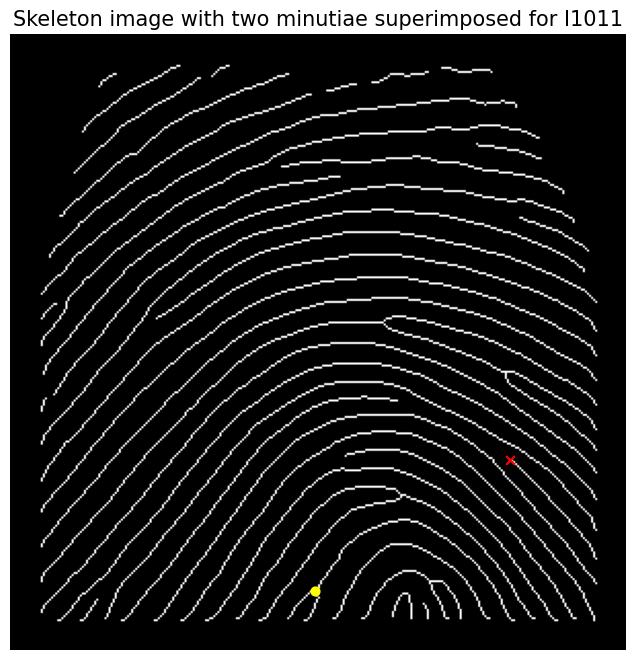

In [70]:
# Feature of RE at (207,243) in image coordinates
m_RE=F_template[18, :]
# Feature of RB at (271,148) in image coordinates
m_RB=F_template[25, :]

print("Features of RE at (207,243) in image coordinates: ", m_RE)
print("Features of RB at (271,148) in image coordinates: ", m_RB)

plt.figure(figsize=(10, 8))  
plt.imshow(A1, cmap = 'gray')
plt.scatter(m_RB[0], m_RB[1], c='yellow', marker = 'o', s = 40)
plt.scatter(m_RE[0], m_RE[1], c='red', marker = "x", s = 40)
plt.axis('off')
plt.title('Skeleton image with two minutiae superimposed for I1011', fontsize = 15)
plt.show()

We can find that <b>xk</b>, <b>yk</b> values for those two minutiae are consistant with image coordinates (row,column) although (<b>xk</b> , <b>yk</b>)=(column ,row). <b>tk</b> values for RE and RB is 1 and 2 respectively. This is also expected as we choose 1 for REs and 2 for RBs. The <b>phi_k</b> values of RE and RB is also consistent. If we consider the origin at the top right of the image, RB is far away from the RE and we see that <b>phi_k</b> value of RB is greater than <b>phi_k</b> value of RE.

We write a function <b>F3k_Generation</b> to get K×4 matrix <b>F_template</b> for future use.

In [71]:
def F3k_Generation(I, T):
    A1 = np.array(I,dtype='bool')
    
    HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RE11, RE21)
    HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RE12, RE22)
    HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RE13, RE23)
    HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RE14, RE24)
    HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RE15, RE25)
    HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RE16, RE26)
    HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RE17, RE27)
    HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RE18, RE28)
    I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18))
    location=np.nonzero(I_RE)
    mask = np.zeros((300,300))
    l1=min(location[1])+2
    l2=max(location[1])-2
    l3=min(location[0])+2
    l4=max(location[0])-2
    mask[l1:l2, l3:l4]=1
    mask_I_RE=I_RE*mask
    location_mask_RE=np.nonzero(mask_I_RE)
    HMT_11=scipy.ndimage.binary_hit_or_miss(A1, RB11, RB21)
    HMT_12=scipy.ndimage.binary_hit_or_miss(A1, RB12, RB22)
    HMT_13=scipy.ndimage.binary_hit_or_miss(A1, RB13, RB23)
    HMT_14=scipy.ndimage.binary_hit_or_miss(A1, RB14, RB24)
    HMT_15=scipy.ndimage.binary_hit_or_miss(A1, RB15, RB25)
    HMT_16=scipy.ndimage.binary_hit_or_miss(A1, RB16, RB26)
    HMT_17=scipy.ndimage.binary_hit_or_miss(A1, RB17, RB27)
    HMT_18=scipy.ndimage.binary_hit_or_miss(A1, RB18, RB28)

    HMT_31=scipy.ndimage.binary_hit_or_miss(A1, RB31, RB41)
    HMT_32=scipy.ndimage.binary_hit_or_miss(A1, RB32, RB42)
    HMT_33=scipy.ndimage.binary_hit_or_miss(A1, RB33, RB43)
    HMT_34=scipy.ndimage.binary_hit_or_miss(A1, RB34, RB44)
    HMT_35=scipy.ndimage.binary_hit_or_miss(A1, RB35, RB45)
    HMT_36=scipy.ndimage.binary_hit_or_miss(A1, RB36, RB46)
    HMT_37=scipy.ndimage.binary_hit_or_miss(A1, RB37, RB47)
    HMT_38=scipy.ndimage.binary_hit_or_miss(A1, RB38, RB48)
    I_RE=np.logical_or.reduce((HMT_11,HMT_12,HMT_13,HMT_14,HMT_15,HMT_16,HMT_17,HMT_18\
                           , HMT_31,HMT_32,HMT_33,HMT_34,HMT_35,HMT_36,HMT_37,HMT_38))
    location_RB=np.nonzero(I_RE)
    listx1=location_mask_RE[0]
    listy1=location_mask_RE[1]
    length_list_RE=len(listx1)
    listx2=location_RB[0]
    listy2=location_RB[1]
    list_x=np.concatenate((listx1, listx2))
    list_y=np.concatenate((listy1, listy2))
    P=np.sqrt(np.square(list_x - list_x.reshape(-1,1)) + np.square(list_y - list_y.reshape(-1,1)))
    I_G=np.zeros((P.shape[0], P.shape[1]))
    I_G=np.where(P >= T, 1, 0)
    B=np.ones((1,len(list_x)))
    for m in range(len(list_x)):
        X=I_G[m,:]
        n_zeros = np.count_nonzero(X==0)
        if n_zeros>1:
            B[0,m]=0
    C_RE=B[0,0:length_list_RE]
    D_RB=B[0,length_list_RE:len(list_x)]
    index_RE = np.where(C_RE == 0)
    arrx1 = np.delete(listx1, index_RE)
    arry1 = np.delete(listy1, index_RE)
    index_RB = np.where(D_RB == 0)
    arrx2 = np.delete(listx2, index_RB)
    arry2 = np.delete(listy2, index_RB)
    xk_RE = arry1.reshape((1,len(arrx1)))
    yk_RE = arrx1.reshape((1,len(arrx1)))
    xk_RB = arry2.reshape((1,len(arrx2)))
    yk_RB = arrx2.reshape((1,len(arrx2)))
    xk=np.concatenate((xk_RE, xk_RB), axis=1)
    yk=np.concatenate((yk_RE, yk_RB), axis=1)
    
    orientim = ridge_orient(A1, 1, 7, 7)
    phi_k = orientim[xk,yk]
    tk_RE=np.ones((xk_RE.shape[0],xk_RE.shape[1]))
    tk_RB=2*np.ones((xk_RB.shape[0],xk_RB.shape[1]))
    tk=np.concatenate((tk_RE, tk_RB), axis=1)
    F_template2 =np.array([xk, yk, phi_k, tk])
    F_template1=F_template2.reshape((4,tk.shape[1]))
    F_template=np.transpose(F_template1)
    return F_template

## (d-ii) Compute Local Feature Matrix: 
In this part, we use l=2 neighbors for the definition of the local neighborhood feature. First of all, we define <b>dphi</b> function as Equations (2) of jiang2000 paper.


In [72]:
def dphi(t1,t2):
    ang=math.pi
    if (t1-t2 <= ang) & (t1-t2 > -ang):
        diff_phi = t1-t2
    elif (t1-t2) <= -ang:
        diff_phi = 2 * (math.pi) + t1 - t2
    else:
        diff_phi = 2 * (math.pi) - t1 + t2
    return diff_phi
        
        

We also define a function <b>Local_Feature</b> for storing features in a K×9 matrix F3k_template for a image.
For each minutia, we find the two nearest minutiae (minutiae <b>i</b> and <b>j</b> in the <b>Local_Feature</b> function), and define the length-9 local feature vector similar to that of equation (6) in the jiang2000 paper. 

In [73]:
def Local_Feature(F_template):
    xk=F_template[:,0]
    yk=F_template[:,1]
    phi_k=F_template[:,2]
    tk=F_template[:,3]
    rel_dis=np.sqrt(np.square(xk - xk.reshape(-1,1)) + np.square(yk - yk.reshape(-1,1)))
    F3k_template=np.zeros((tk.shape[0], 9))
    
    for k in range(len(xk)):
        loc_close1 = np.where(rel_dis[k,:] == heapq.nsmallest(2, rel_dis[k,:])[-1])
        loc_close2 = np.where(rel_dis[k,:] == heapq.nsmallest(3, rel_dis[k,:])[-1])
        k_minutiae=F_template[k, :] 
        i_minutiae=F_template[loc_close1, :]
        j_minutiae=F_template[loc_close2, :]
        d_ki=heapq.nsmallest(2, rel_dis[k,:])[-1]
        d_kj=heapq.nsmallest(3, rel_dis[k,:])[-1]
        y_ki_diff= k_minutiae[1]-i_minutiae[0, 0, 1]
        x_ki_diff= k_minutiae[0]-i_minutiae[0, 0, 0]
        y_kj_diff= k_minutiae[1]-j_minutiae[0, 0, 1]
        x_kj_diff= k_minutiae[0]-j_minutiae[0, 0, 0]
        theta_ki = dphi(math.atan2(y_ki_diff,x_ki_diff), k_minutiae[2])
        theta_kj = dphi(math.atan2(y_kj_diff,x_kj_diff), k_minutiae[2])
        phi_ki = dphi(k_minutiae[2],i_minutiae[0, 0, 2])
        phi_kj = dphi(k_minutiae[2],j_minutiae[0, 0, 2])
        tk = k_minutiae[3]
        ti = i_minutiae[0, 0, 3]
        tj = j_minutiae[0, 0, 3]
        F3_k=[d_ki, d_kj, theta_ki, theta_kj, phi_ki, phi_kj, tk, ti, tj]
        F3k_template[k, :]=F3_k
    return F3k_template
        
    

Using the same RE and RB from I1011 as in part (d-i), we display those minutiae and their two nearest neighbors on the skeleton image. We use a red x for the RE in question and a red diamond for the two closest neighbors to the RE. We use a yellow circle for the RB in question and a yellow square for the two closest neighbors to the RB.

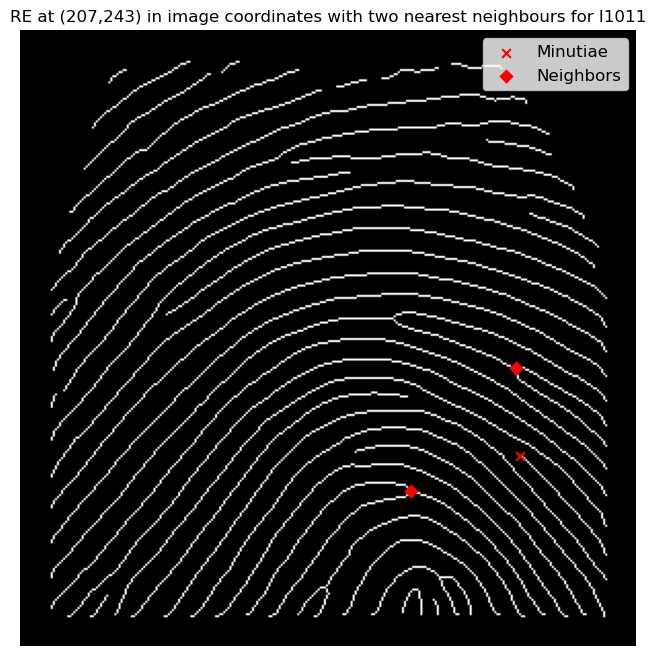

In [74]:
#RE at (207,243) in image coordinates
minutiae=18
xk=F_template[:,0]
yk=F_template[:,1]
phi_k=F_template[:,2]
tk=F_template[:,3]
rel_dis=np.sqrt(np.square(xk - xk.reshape(-1,1)) + np.square(yk - yk.reshape(-1,1)))
loc_close1 = np.where(rel_dis[minutiae,:] == heapq.nsmallest(2, rel_dis[minutiae,:])[-1])
loc_close2 = np.where(rel_dis[minutiae,:] == heapq.nsmallest(3, rel_dis[minutiae,:])[-1])
k_minutiae=F_template[minutiae, :] 
i_minutiae=F_template[loc_close1, :]
j_minutiae=F_template[loc_close2, :]
plt.figure(figsize=(10, 8))  
plt.imshow(A1, cmap = 'gray')
plt.scatter(k_minutiae[0], k_minutiae[1], c='red', marker = 'x', s = 40, label='Minutiae')
plt.scatter(i_minutiae[0, 0, 0], i_minutiae[0, 0, 1], c='red', marker = "D", s = 40, label='Neighbors')
plt.scatter(j_minutiae[0, 0, 0], j_minutiae[0, 0, 1], c='red', marker = "D", s = 40)
plt.axis('off')
plt.legend();
plt.title('RE at (207,243) in image coordinates with two nearest neighbours for I1011', fontsize = 12)
plt.show()
    

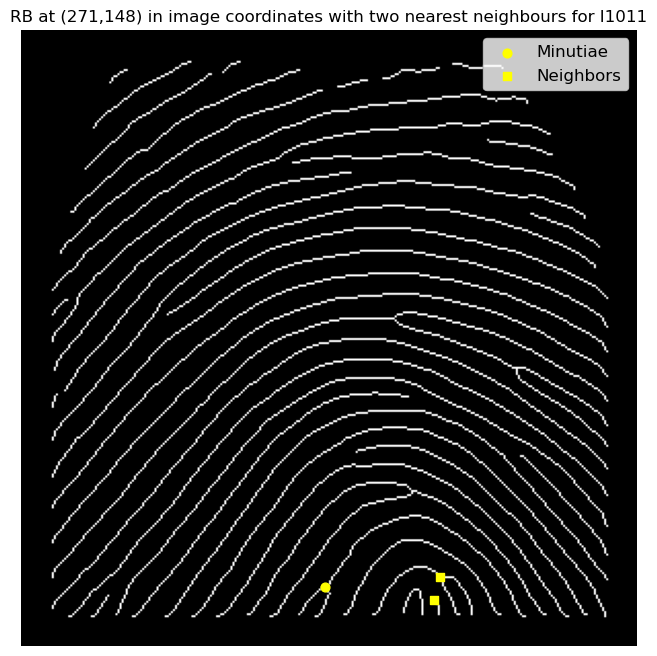

In [75]:
#RB at (271,148) in image coordinates
minutiae=25
xk=F_template[:,0]
yk=F_template[:,1]
phi_k=F_template[:,2]
tk=F_template[:,3]
rel_dis=np.sqrt(np.square(xk - xk.reshape(-1,1)) + np.square(yk - yk.reshape(-1,1)))
loc_close1 = np.where(rel_dis[minutiae,:] == heapq.nsmallest(2, rel_dis[minutiae,:])[-1])
loc_close2 = np.where(rel_dis[minutiae,:] == heapq.nsmallest(3, rel_dis[minutiae,:])[-1])
k_minutiae=F_template[minutiae, :] 
i_minutiae=F_template[loc_close1, :]
j_minutiae=F_template[loc_close2, :]
plt.figure(figsize=(10, 8))  
plt.imshow(A1, cmap = 'gray')
plt.scatter(k_minutiae[0], k_minutiae[1], c='yellow', marker = 'o', s = 40, label='Minutiae')
plt.scatter(i_minutiae[0, 0, 0], i_minutiae[0, 0, 1], c='yellow', marker = "s", s = 40, label='Neighbors')
plt.scatter(j_minutiae[0, 0, 0], j_minutiae[0, 0, 1], c='yellow', marker = "s", s = 40)
plt.axis('off')
plt.title('RB at (271,148) in image coordinates with two nearest neighbours for I1011', fontsize = 12)
plt.legend();
plt.show()
        

In [76]:
FF=Local_Feature(F_template)

print('Feature vectors for RE at (207,243) in image coordinates:') 
print(FF[18, :])

print('Feature vectors for RB at (271,148) in image coordinates:') 
print(FF[25, :])

Feature vectors for RE at (207,243) in image coordinates:
[ 4.30464865e+01  5.56596802e+01  9.57979325e-01 -8.76726277e-01
 -1.90582730e+00 -2.31994956e-02  1.00000000e+00  2.00000000e+00
  2.00000000e+00]
Feature vectors for RB at (271,148) in image coordinates:
[53.33854141 56.22277119  2.63693728  2.43516009 -0.14586054 -0.10697414
  2.          1.          2.        ]


For RE, the nearest neighbours are two RBs, as a result, we get value of 2 for both <b>ti</b> and <b>tj</b>. The distances <b>d_ki</b> and <b>d_kj</b> match when we compute the euclidean distance between the RE and its 2 nearest neighbours. Corresponding to right handed cartesian imaging system, positive x points to right and positive y points to points up, <b>phi_ki</b> and <b>phi_kj</b> sign matches the feature value we get for RE. Also, <b>theta_ki</b> and <b>theta_kj</b> sign matches the feature value we get for RE according to right handed cartesian imaging system. For RB, the nearest neighbours are one RE and one RB, as a result, we get value of 1 and 2 for  ti and tj. The distances d_ki and d_kj match when we compute the euclidean distance between the RB and its 2 nearest neighbours. Corresponding to right handed cartesian imaging system, positive x points to right and positive y points to points up, <b>phi_ki</b> and <b>phi_kj</b> sign matches the feature value we get for RB. Also, <b>theta_ki</b> and <b>theta_kj</b> sign matches the feature value we get for RE according to right handed cartesian imaging system.


## (d-iii) Similarity Level Function: 
We create a function <b>similarity_level(F3k_image, F3k_template)</b> which computes the similarity level
according to equations (7) and (8) in the jiang2000 paper. Inputs to the function will be the <b>K_i× 9</b>
local feature matrix from the input image <b>F3k_image</b> and the <b>K_j × 9</b> local feature matrix from the template image <b>F3k_template</b>.

In [77]:
def similarity_level(F3k_image,F3k_template):
    M=F3k_image.shape[0]
    N=F3k_template.shape[0]
    W = np.array([1, 1, 0.3*180 / math.pi, 0.3*180 / math.pi, 0.3*180 / math.pi, 0.3*180 / math.pi, 3, 3, 3])
    W=W.reshape((1,9))
    bl=54
    sl=np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            abs_diff=(np.abs(F3k_image[i,:]-F3k_template[j,:])).reshape((9, 1))
            condition=np.matmul(W,abs_diff)
            if (condition < bl):
                sl[i,j] = (bl - condition)/bl
            else:
                sl[i,j] = 0
    return sl  

As a sanity check, we use the <b>101_1.tif</b> image as both the template and input image and show that
similarity level is sparse and has ones along the diagonal. 

In [78]:
T=10.7
A = imageio.imread('DB1_B_thin/101_1.tif')

# Extract Feature Vector
F3k_tem=F3k_Generation(A, T)

# Compute Local Feature Matrix
F3k_template=Local_Feature(F3k_tem)

# similarity level with 101_1.tif image as both template and input image
sl=similarity_level(F3k_template,F3k_template)
print('sl along the diagonal', np.diag(sl))

min_dia=np.min(np.diag(sl))
max_dia=np.max(np.diag(sl))
print('Mininum of main diagonal: ', min_dia)
print('Maximum of main diagonal: ', max_dia)



sl along the diagonal [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Mininum of main diagonal:  1.0
Maximum of main diagonal:  1.0


We also display the <b>sl</b> when 101_1.tif image is considered as as both the template and input image.
We find that in this case, <b>sl</b> is a relatively sparse matrix (lots of zeros corresponding to very
different minutiae) with ones along the diagonal (comparing minutia to themselves).

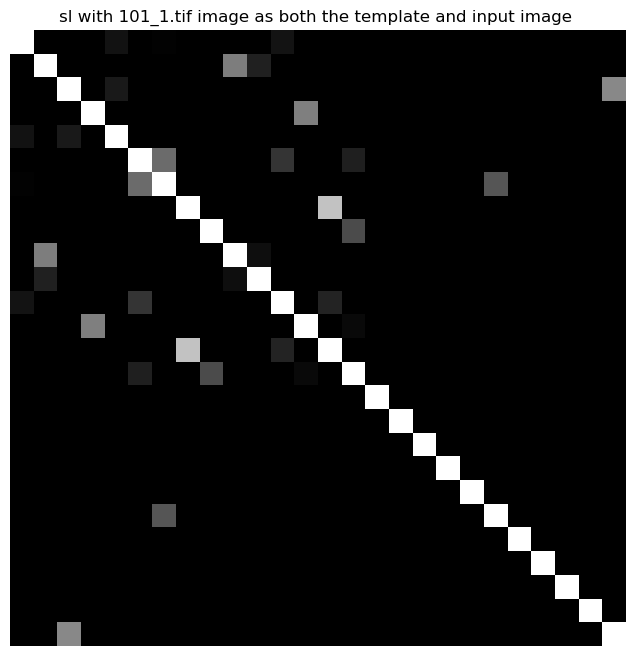

In [79]:
plt.figure(figsize=(10, 8))  
plt.imshow(sl, cmap = 'gray')
plt.axis('off')
plt.title('sl with 101_1.tif image as both the template and input image ', fontsize = 12)
plt.show()

We also use the <b>101_1.tif</b>  as the template image and <b>101_2.tif</b> as the input image and display the similarity level matrix </b>sl2</b> as an image.

In [80]:
B = imageio.imread('DB1_B_thin/101_2.tif')
F3k_im=F3k_Generation(B, T)
F3k_image=Local_Feature(F3k_im)
sl2= similarity_level(F3k_image,F3k_template)

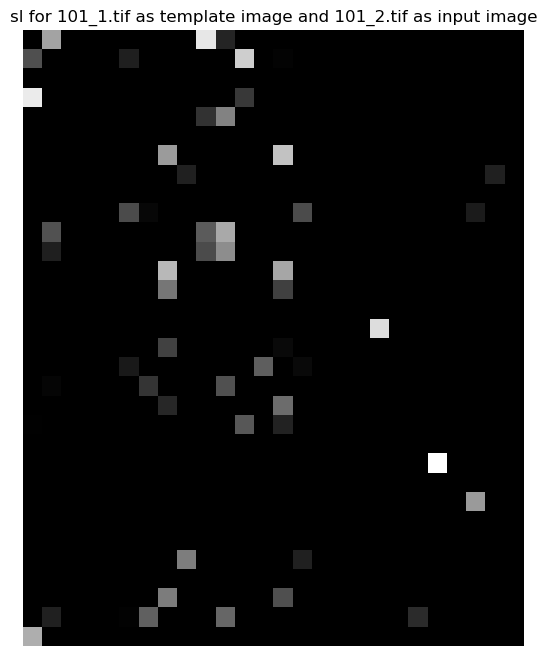

In [81]:
plt.figure(figsize=(10, 8))  
plt.imshow(sl2, cmap = 'gray')
plt.axis('off')
plt.title('sl for 101_1.tif as template image and 101_2.tif as input image', fontsize = 12)
plt.show()

## (d-iv) Compute Global Feature Matrix:
We write the <b>global_feature</b> function to use the best matched minutiae pair to define the global feature vector using equations (9) and (10) in the jiang2000 paper.

In [82]:
def global_feature(Fk_im, best):
    ss=Fk_im.shape[0]
    Fg = np.zeros((ss,3))
    PP=len(Fk_im)
    for i in range (PP):
        r_kb=distance.euclidean([Fk_im[i, 0], Fk_im[i, 1]], [best[0], best[1]])
        y_kb_diff=Fk_im[i,1]-best[1]
        x_kb_diff=Fk_im[i,0]-best[0]
        theta_kb = dphi(math.atan2(y_kb_diff,x_kb_diff), best[2])
        phi_kb = dphi(Fk_im[i,2], best[2])
        Fg[i,:] = [r_kb,theta_kb,phi_kb]
    return Fg

We find the best-matched structure pair (<b>b1</b>, <b>b2</b>) when <b>101_1.tif</b> as the template image and <b>101_2.tif</b> as the input image by maximizing the similarity level <b>sl2</b> using equations (9) in the jiang2000 paper. <b>b1</b> is a specific minutia in the input image and <b>b2</b> is a specific minutia in the template image. Then we compute global feature matrix <b>Fgi</b> and <b>Fgj</b> for input and template image corresponding to the <b>b1</b> -th minutia and <b>b2</b> -th minutia. 

In [83]:
index_best_match_pair = np.unravel_index(np.argmax(sl2, axis=None), sl2.shape)
b1 = F3k_im[index_best_match_pair[0]]
b2 = F3k_tem[index_best_match_pair[1]]

Fgi=global_feature(F3k_im, b1)

Fgj=global_feature(F3k_tem, b2)

print('Index best match pair:', index_best_match_pair)


Index best match pair: (22, 21)


In [84]:
print('Fgi is: ', Fgi)

Fgi is:  [[ 1.37186005e+02  2.89677177e+00 -3.81787276e-01]
 [ 1.18406081e+02  2.77531842e+00 -3.21748313e-01]
 [ 1.59762323e+02  1.14930509e+00 -1.86510786e-01]
 [ 9.84885780e+01  2.53990685e+00 -3.10765283e-01]
 [ 1.32653684e+02  2.98712321e+00 -3.69074913e-01]
 [ 9.12688337e+01  1.55495330e+00 -2.20071982e-01]
 [ 1.28456218e+02  3.07856412e+00 -3.76069677e-01]
 [ 7.65506368e+01  1.77514366e+00 -1.74457084e-01]
 [ 1.53847327e+02  1.02325451e+00 -3.42665088e-02]
 [ 8.42199501e+01  2.94907279e+00 -3.02146974e-01]
 [ 1.27455875e+02 -3.05435407e+00 -3.20914765e-01]
 [ 1.26810883e+02 -2.91993817e+00 -2.66536873e-01]
 [ 1.26372465e+02 -2.82225023e+00 -2.54392054e-01]
 [ 1.24145076e+02 -2.63905585e+00 -3.56833671e-01]
 [ 4.12310563e+01 -1.26488880e+00  5.26526275e-01]
 [ 8.69770085e+01 -1.79717839e+00 -2.19914346e+00]
 [ 1.97344876e+02 -2.59596313e-01 -2.01477107e+00]
 [ 1.87579317e+02 -3.32680249e-01 -2.02062487e+00]
 [ 1.48569849e+02 -1.10752311e+00 -1.81797824e+00]
 [ 1.81157390e+02 -1.5

The row in <b>Fgi</b> corresponding to the 22 -th minutia (<b>b1</b>) is zero for the first and third
features.

In [85]:
print('Fgj is: ', Fgj)

Fgj is:  [[ 1.23967738e+02  2.31821397e+00 -3.49358285e-01]
 [ 1.33015037e+02  2.54963105e+00 -3.14326249e-01]
 [ 1.29448832e+02  1.77651204e+00 -3.22106837e-01]
 [ 1.23490890e+02  2.69411097e+00 -2.73483986e-01]
 [ 1.73104015e+02  1.13617943e+00 -1.28854786e-01]
 [ 9.84123976e+01  2.62617444e+00 -2.79915445e-01]
 [ 9.04267659e+01  1.56713709e+00 -2.35704653e-01]
 [ 1.66820263e+02  1.02193131e+00 -3.36808046e-02]
 [ 7.40405294e+01  1.85222764e+00 -2.05940316e-01]
 [ 1.08226614e+02  3.08927620e+00 -3.12054357e-01]
 [ 1.65387424e+02  8.88845658e-01 -1.55339051e-02]
 [ 8.42021377e+01  3.05997292e+00 -3.21481555e-01]
 [ 1.05118980e+02 -3.05750650e+00 -3.12359965e-01]
 [ 1.65130252e+02  7.64027414e-01  7.40402949e-02]
 [ 1.59254513e+02  6.25550584e-01  1.47642247e-01]
 [ 1.10018180e+02  5.87186962e-01  3.10513390e-01]
 [ 3.86393582e+01 -1.18395749e+00  5.57110636e-01]
 [ 6.74462749e+01 -7.31635980e-01 -2.11836307e+00]
 [ 9.12852672e+01 -1.74844705e+00 -2.00624664e+00]
 [ 1.93767902e+02 -2.0

The row in <b>Fgj</b> corresponding to the 21 -th minutia (<b>b2</b>) is zero for the first and third
features.

## (d-v) Matching Score:
We write the <b>matching_score</b> function to compute the matching score using equations (11) and (12) in jiang2000.

In [86]:
def matching_score(Fg_im, Fg_tem, sl):
    M=Fg_im.shape[0]
    N=Fg_tem.shape[0]
    ml = np.zeros((M,N))
    Bg = np.array([8,math.pi/6,math.pi/6])
    for i in range(M):
        for j in range(N):
            condition=np.abs(Fg_im[i,:] - Fg_tem[j,:])
            if (condition < Bg).all():
                ml[i,j] = 0.5 + (0.5 * sl[i,j])
            else:
                ml[i,j]=0
    
    MM=ml.shape[0]
    NN=ml.shape[1]
    
    for i in range(MM):
        for j in range(NN):
            if (ml[i,:] > ml[i,j]).any():
                ml[i,j] = 0
                
    for i in range(MM):
        for j in range(NN):
            if (ml[:,j] > ml[i,j]).any():
                ml[i,j] = 0
                
    divv=np.max((M,N))
    Ms1=np.sum(ml)/divv
    Ms=Ms1*100
    
    return Ms
                
    

As a sanity check, we use <b>101_1.tif</b> as a template and <b>101_1.tif</b> as the input image, and compute compute and display the matching score which is 100.

In [87]:
index_best_match_pair1 = np.unravel_index(np.argmax(sl, axis=None), sl.shape)
b11 = F3k_tem[index_best_match_pair1[0]]
b22 = F3k_tem[index_best_match_pair1[1]]
Fgi1=global_feature(F3k_tem, b11)
Fgj1=global_feature(F3k_tem, b22)
Ms1= matching_score(Fgi1, Fgj1, sl)
print('Matching score with 101_1.tif as both template and input image: ', Ms1, '%')

Matching score with 101_1.tif as both template and input image:  100.0 %


We also compute and display the matching score when using <b>101_1.tif</b> as the template image and <b>101_2.tif</b> as the input image. 

In [88]:
Ms= matching_score(Fgi, Fgj, sl2)
print('Matching score when 101_1.tif as template image and 101_2.tif as input image: ', Ms, '%')

Matching score when 101_1.tif as template image and 101_2.tif as input image:  40.03822310408248 %


## (e) Fingerprint Verification
In this part, we generate a plot similar to that of Figure 12 in the hong1998 paper by varying a threshold on matching score.

In [89]:
templates=sorted(glob.glob('DB1_B_thin/*_1.tif'));
challenges=sorted(glob.glob('DB1_B_thin/*.tif'));
challenges=sorted(list(set(challenges)-set(templates)));


## (e-i) TPR and FPR:

Using a matching score threshold of 50%, and template image <b>101_1.tif</b>, we compute True positives (TP), 
True negatives (TN), False positives (FP), and False negatives (FN). Then we find true positive rate (TPR) and false positive rate (FPR).

In [90]:
threshold=50
T=10.7
TP=0
TN=0
FP=0
FN=0

begin_time1=time.time()
for individual in range(1):
    for f,image_filename in enumerate(challenges):
        A_tem = imageio.imread(templates[individual])
        tem=F3k_Generation(A_tem, T)
        template=Local_Feature(tem)
        A_chg = imageio.imread(image_filename)
        challenge_img=F3k_Generation(A_chg, T)
        challenge=Local_Feature(challenge_img)
        sl=similarity_level(challenge, template)
        index_best_match_pair = np.unravel_index(np.argmax(sl, axis=None), sl.shape)
        b_chg = challenge_img[index_best_match_pair[0]]
        b_tem = tem[index_best_match_pair[1]]
        Fgi=global_feature(challenge_img, b_chg)
        Fgj=global_feature(tem, b_tem)
        Ms= matching_score(Fgi, Fgj, sl)
        
        template_file=os.path.basename(templates[individual])[:-6]
        image_file = os.path.basename(image_filename)[:-6]
        
        if (Ms >= threshold):
            if (image_file == template_file):
                TP = TP+1
            else:
                FP = FP+1
        else:
            if (image_file != template_file):
                TN = TN+1
            else:
                FN=FN+1

total_time = time.time() - begin_time1
TPR = TP/(TP + FN)
FPR = FP/(TN + FP)

print('TPR for single matching score threshold with template image 101_1.tif: ', TPR)
print('FPR for single matching score threshold with template image 101_1.tif: ', FPR)
print('Total time it took: ', total_time, 's')
        
        
                       

TPR for single matching score threshold with template image 101_1.tif:  0.14285714285714285
FPR for single matching score threshold with template image 101_1.tif:  0.0
Total time it took:  138.39736604690552 s


In [91]:
TP

1

In [92]:
FN

6

In [93]:
FP

0

In [94]:
TN

63

We find that one time a challenge image is correctly accepted as the identity of the template image, 6 times a challenge image is incorrectly rejected as the identity of the template image. We also find that zero time a challenge image is incorrectly accepted as the identity of the template image and 63 times the number of times a challenge image is correctly rejected as not the identity of the template image. By observing these values, we can be hopeful that the model will perform a decent performance on overall dataset, which we will explore next in (e-ii).